# AccelerateAI : Data Science Bootcamp

This notebook will focus on SweetViz

## AutoEDA - SweetViz

### Dataset Reference: Loan Prediction dataset

### Features:

* General Overview - Quick insights of all variables in the dataset using the associations / correlation in the form of a heatmap (including how many duplicates, categorical/numerical/text variables etc.)
* Details about each variables / features in the dataset - missing values, distinct etc.
* Compares Train and Test datasets
* Provides visualization of target variable in context of train dataset


### When To Use?

* Need some quick insights about an unknown dataset
* Use this as a basis for your further EDA analysis on top of it
* Need to compare some quick statistical insights between train and test datasets

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
#!pip install sweetviz # Please use it for the first time if it is not installed in your environment

In [3]:
import sweetviz as sv

In [4]:
df_train = pd.read_csv("./loan-train.csv")

df_train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
df_test = pd.read_csv("./loan-test.csv")

df_test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [6]:
df_train.shape

(614, 13)

In [7]:
df_test.shape

(367, 12)

## Analyze

In [8]:
analysis_report = sv.analyze(df_train)


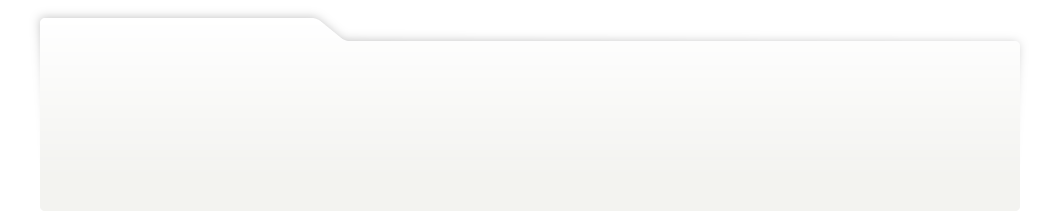
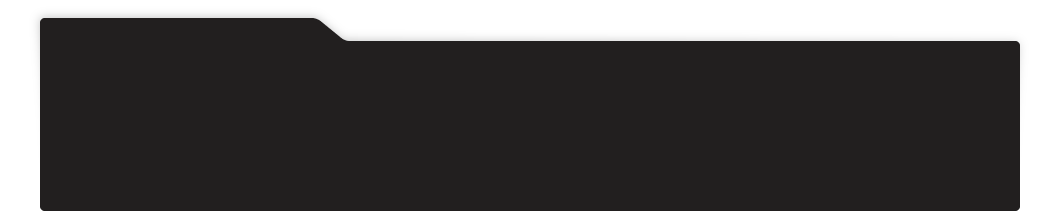
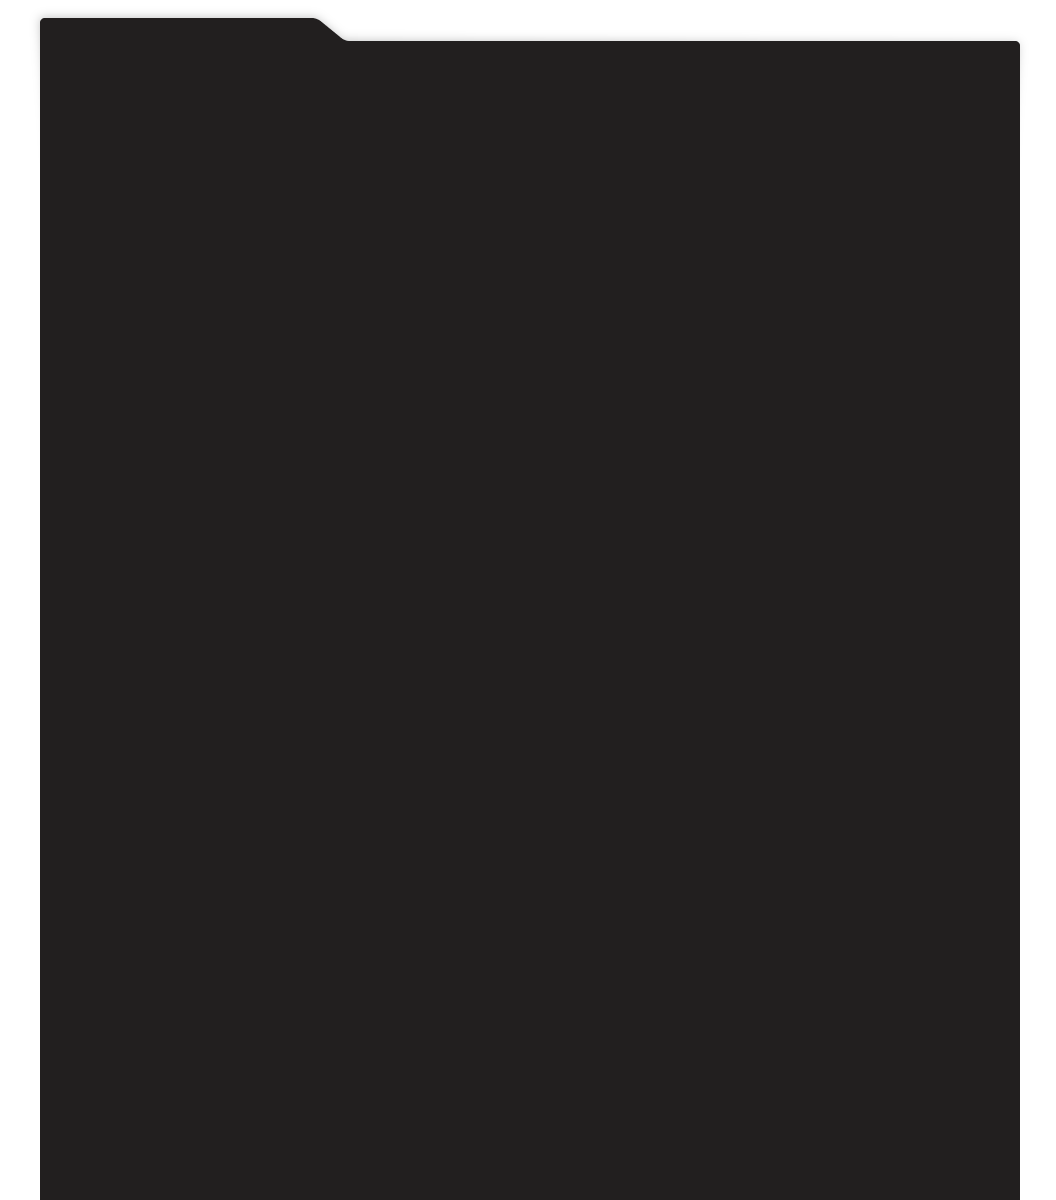
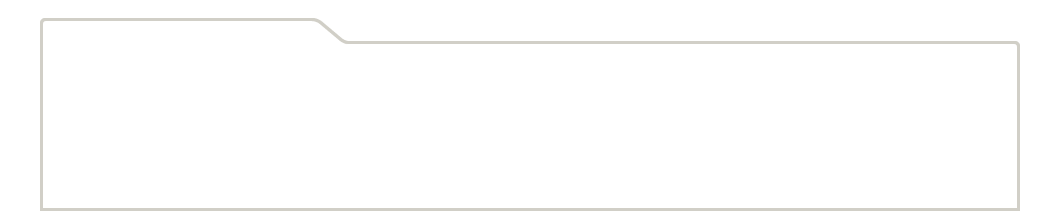
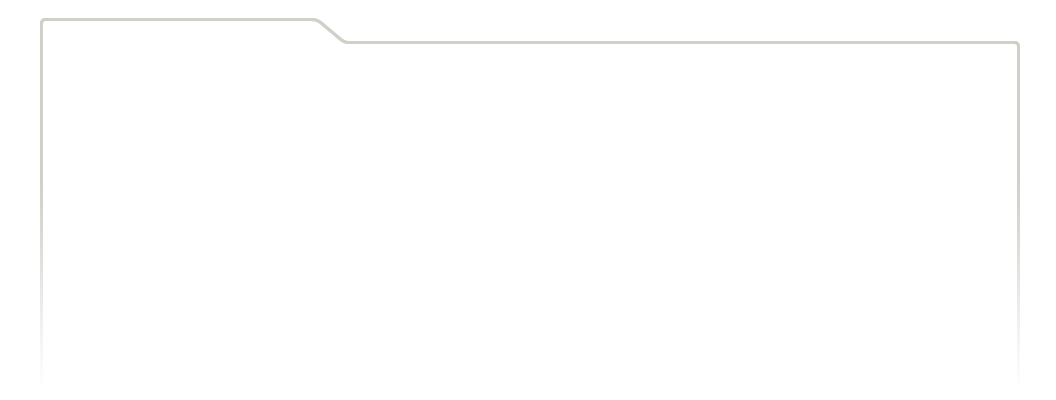
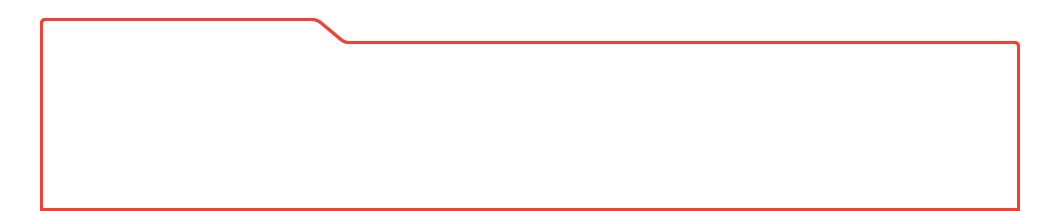
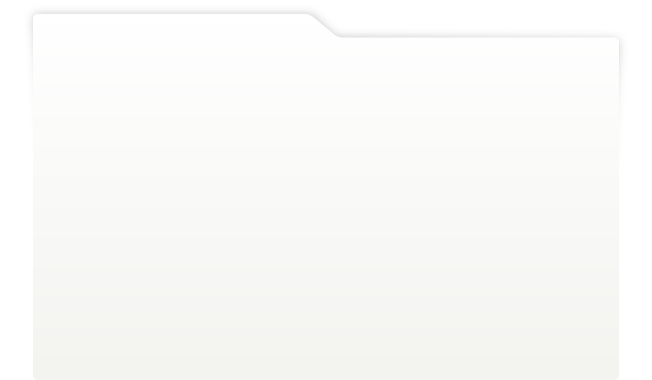
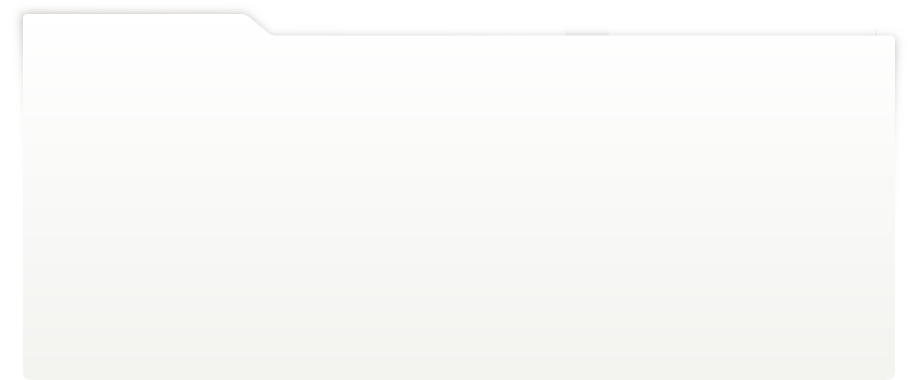
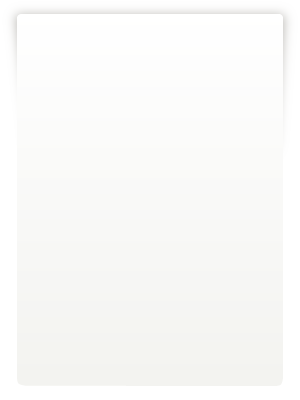
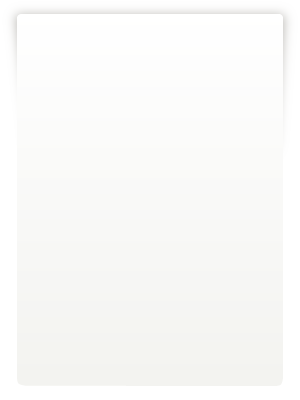
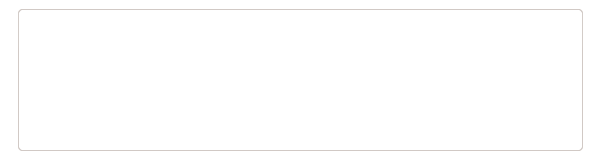
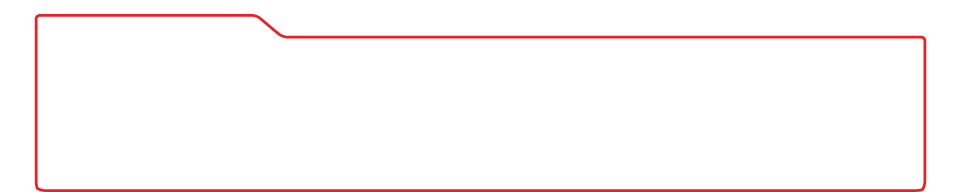
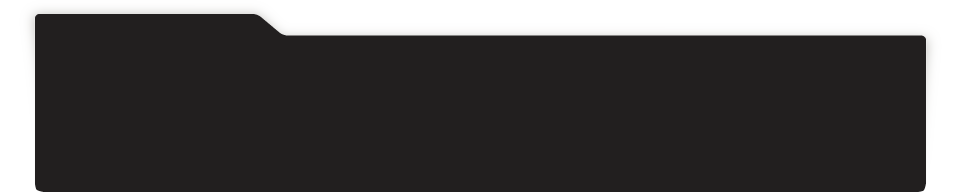
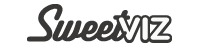
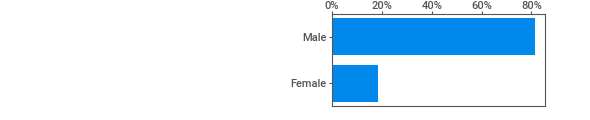
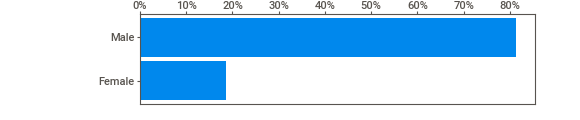
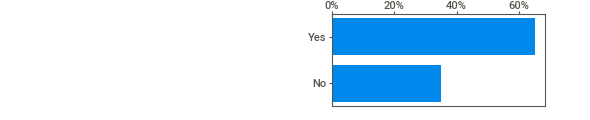
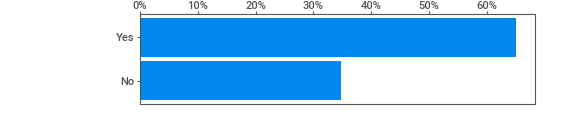
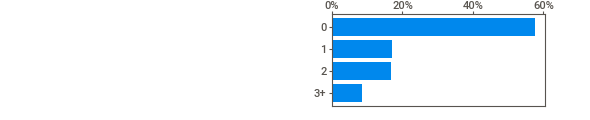
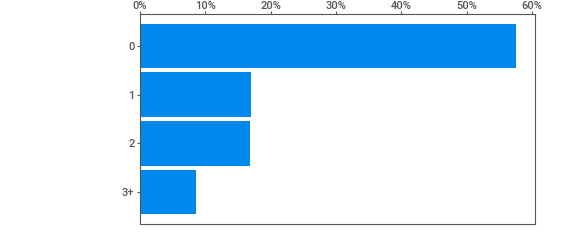
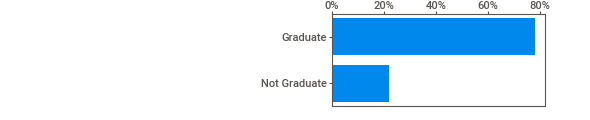
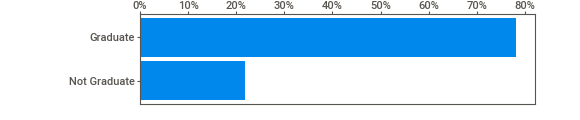
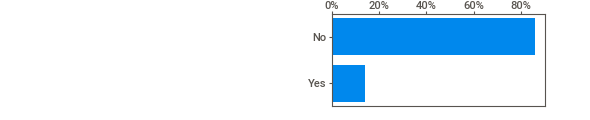
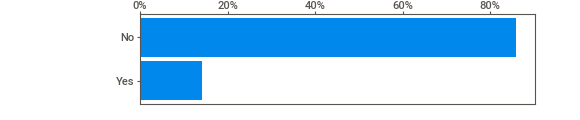
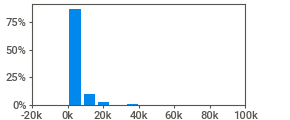
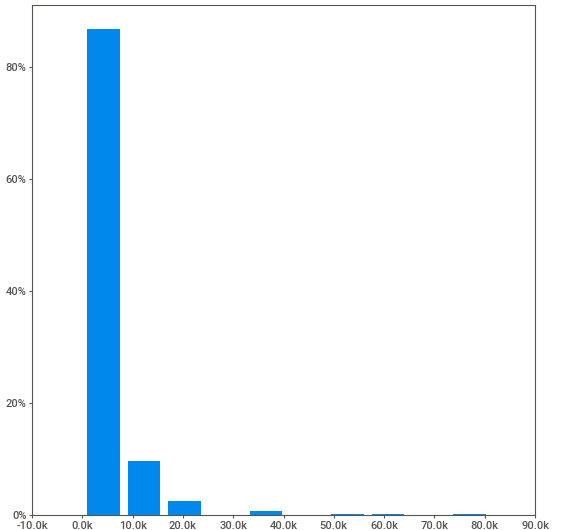
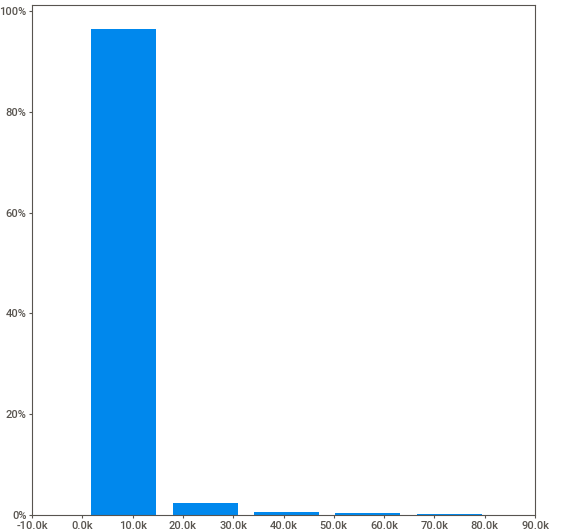
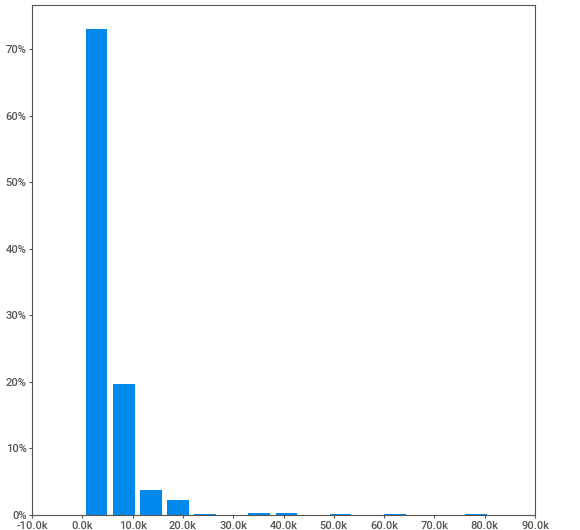
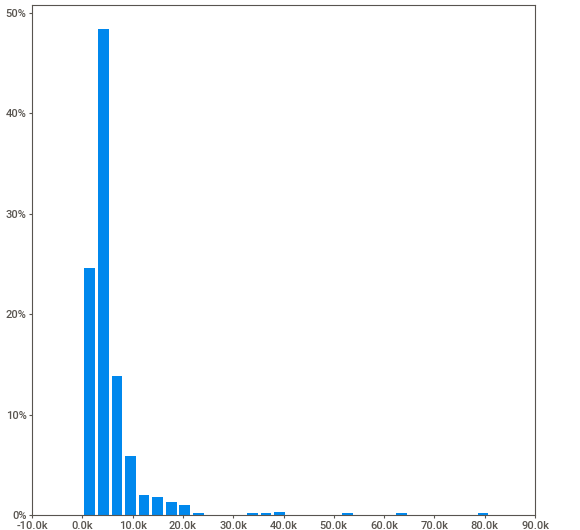
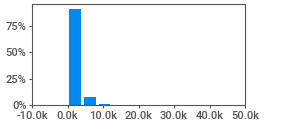
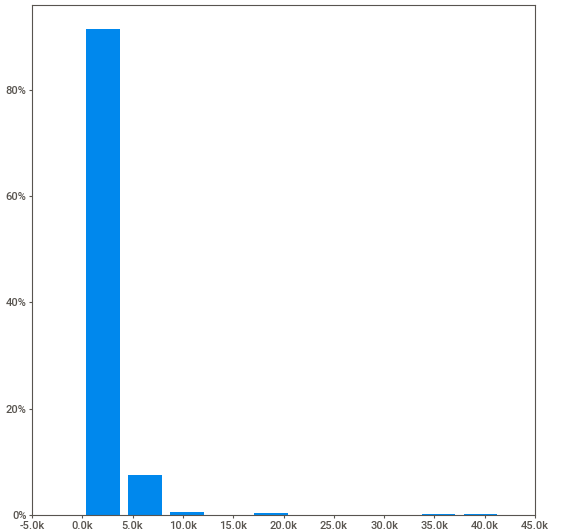
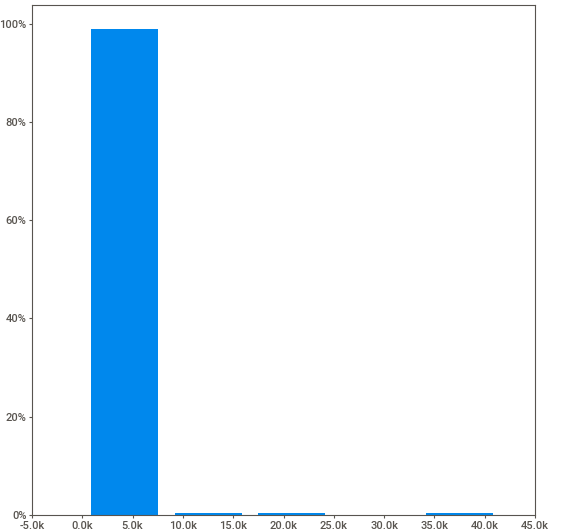
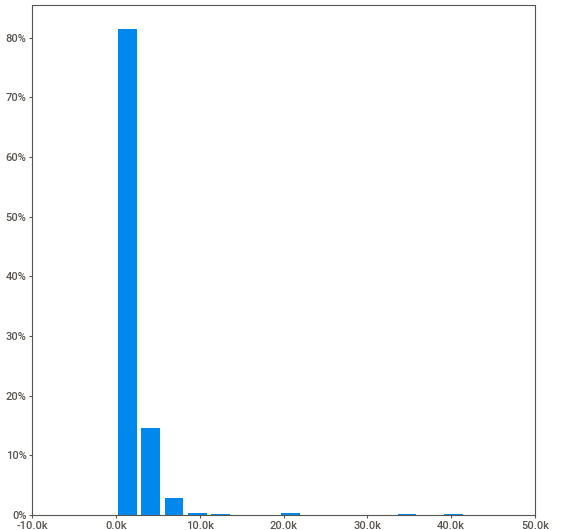
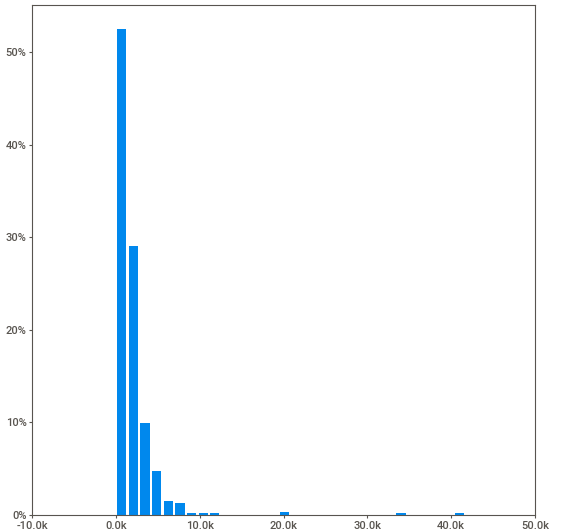
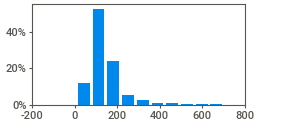
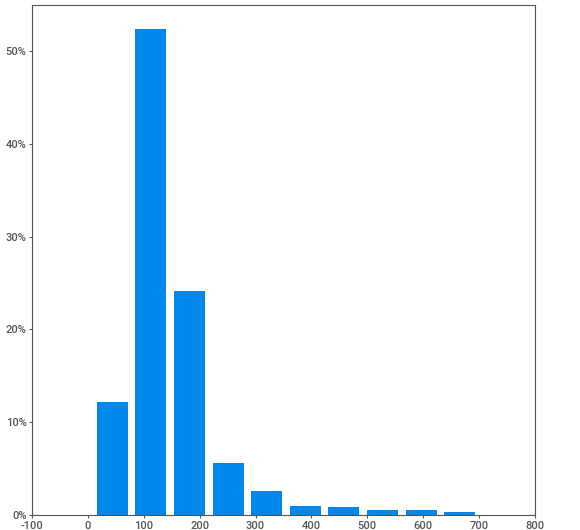
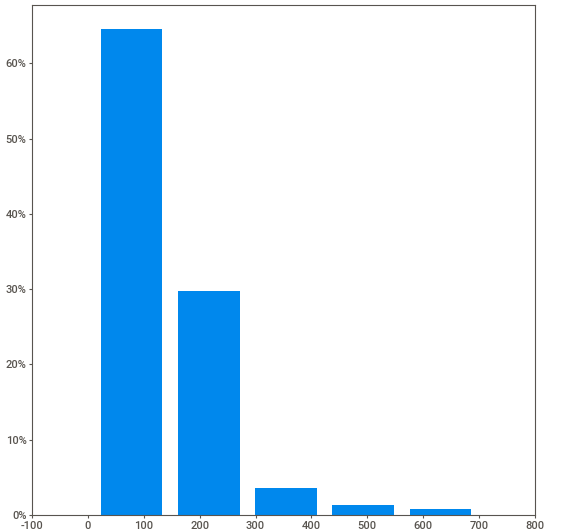
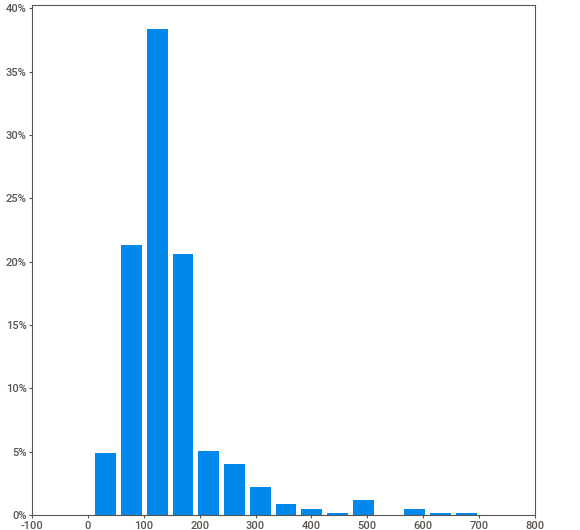
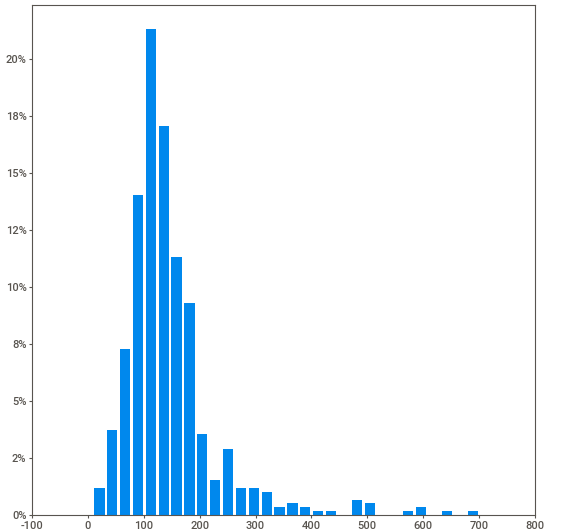
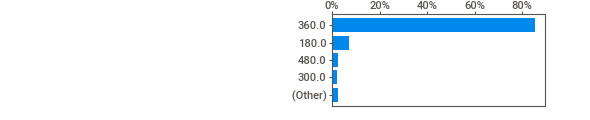
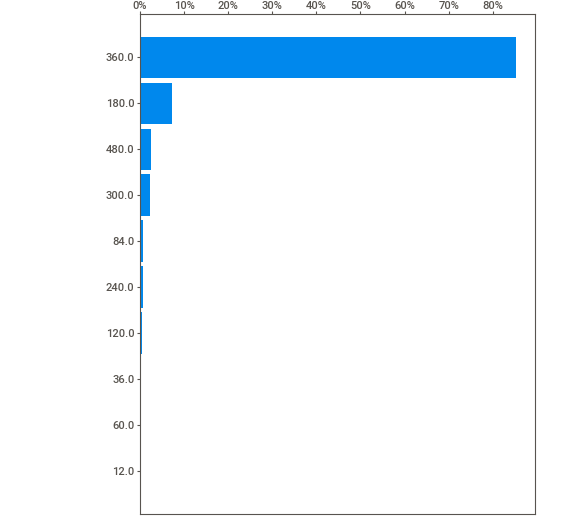
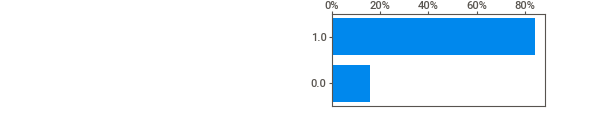
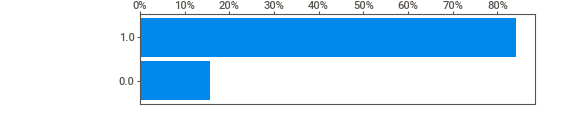
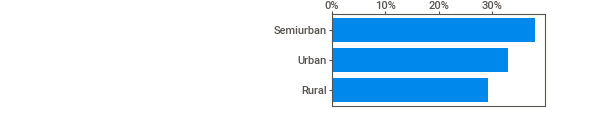
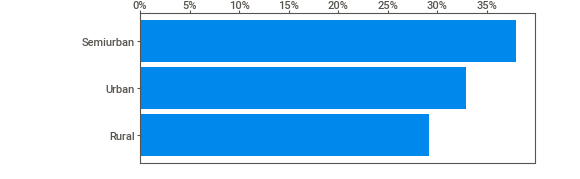
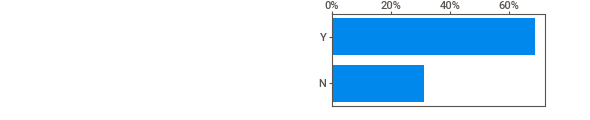
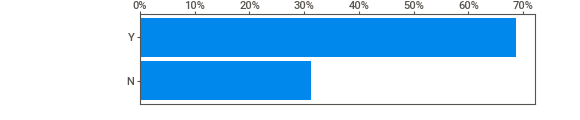
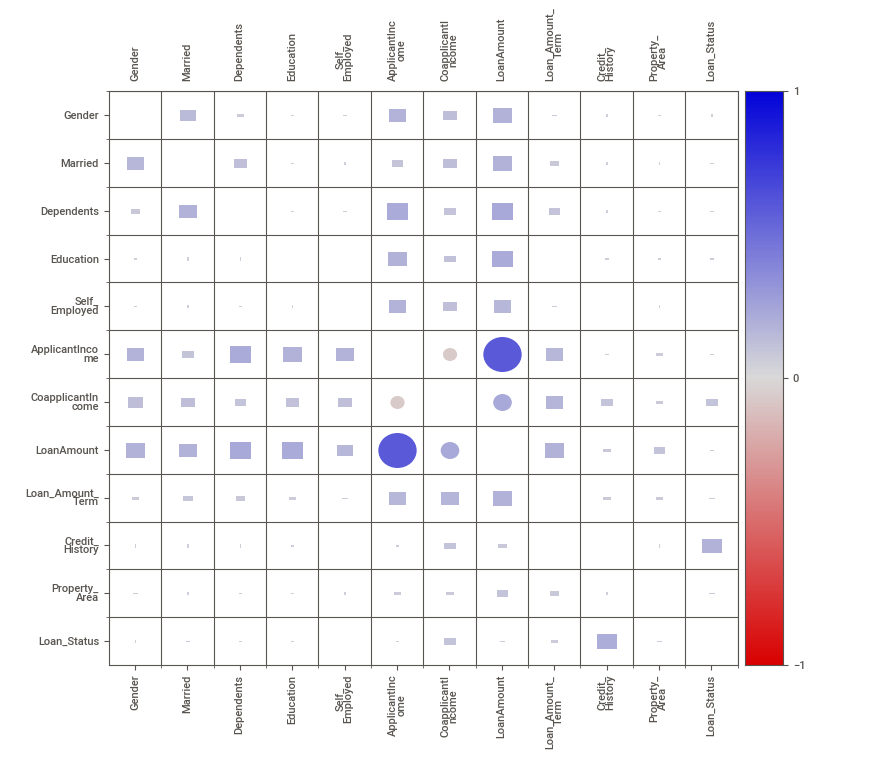
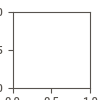

In [9]:
# analysis_report.show_html() # This will generate a separate report named SWEETVIZ_REPORT.html
analysis_report.show_notebook(w="100%",h="full")

In [10]:
analysis_report2 = sv.analyze([df_train,'Train'], target_feat='Loan_Status')


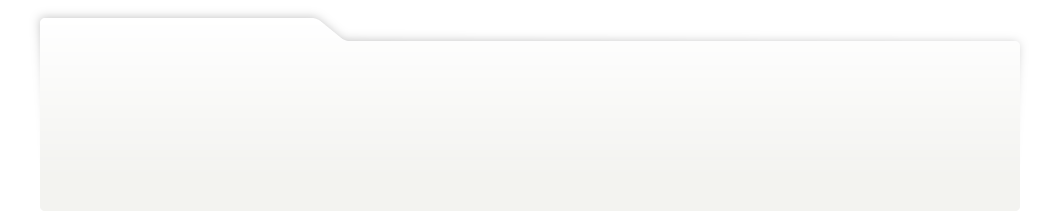
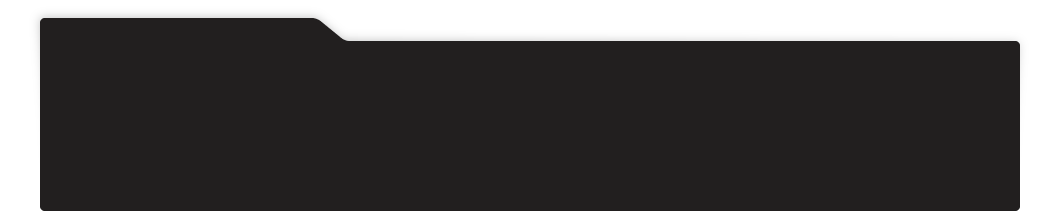
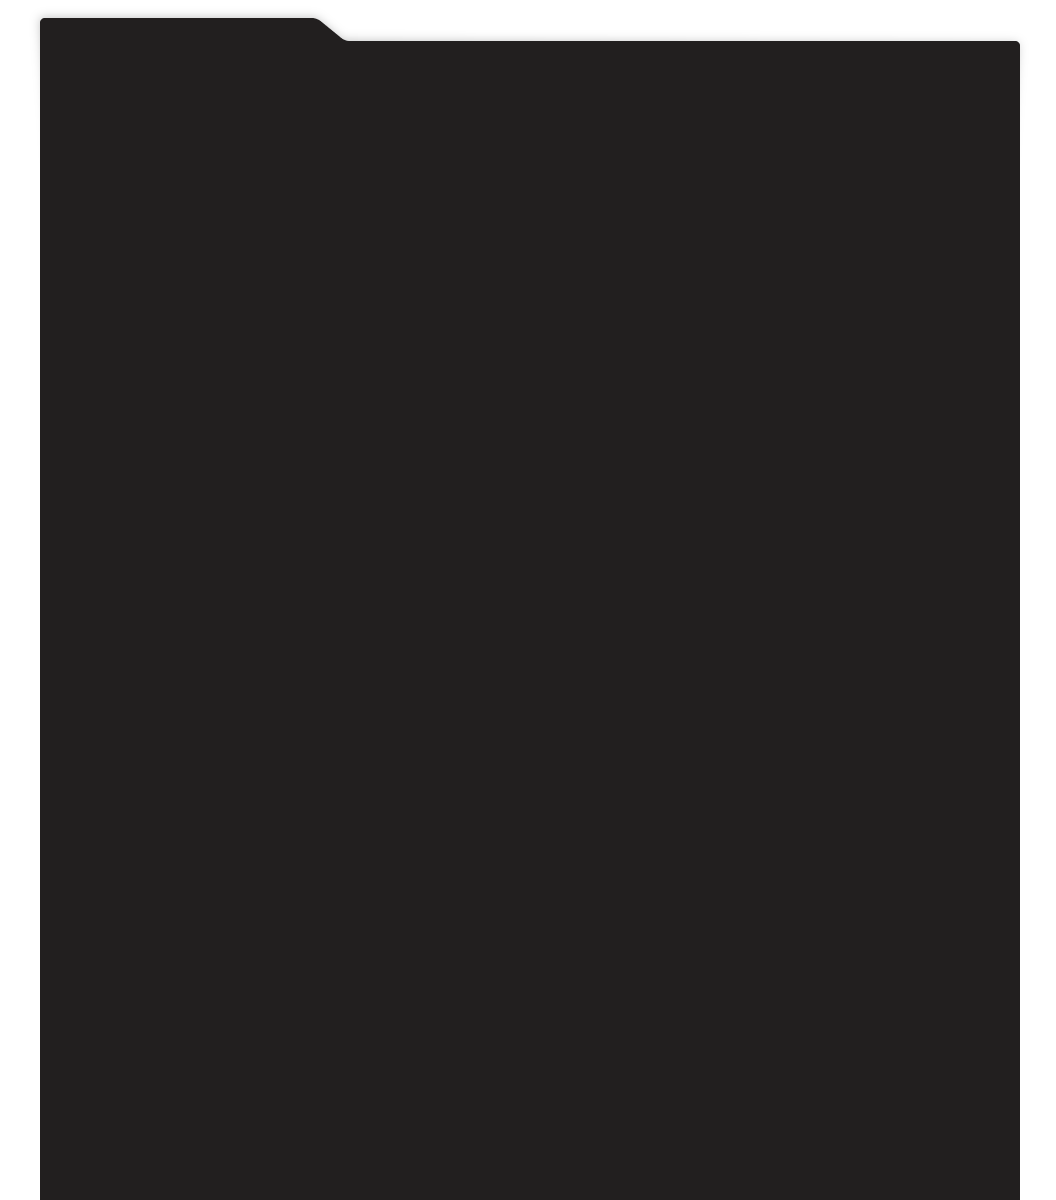
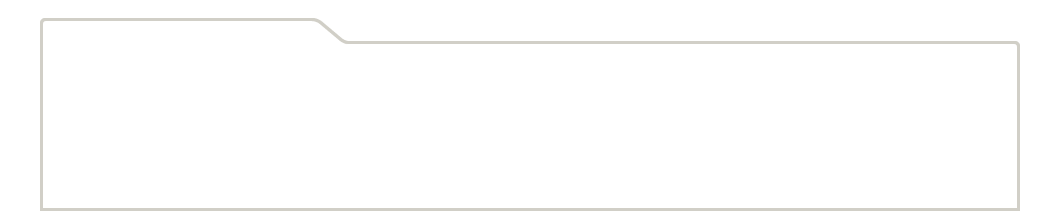
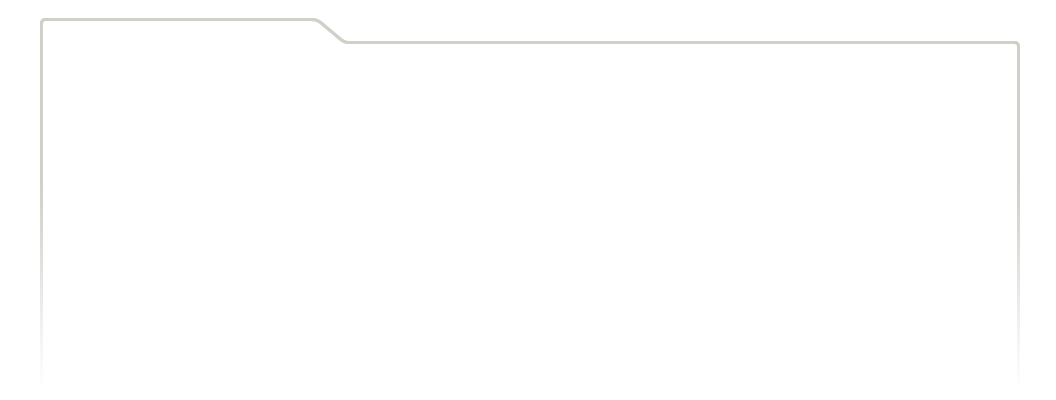
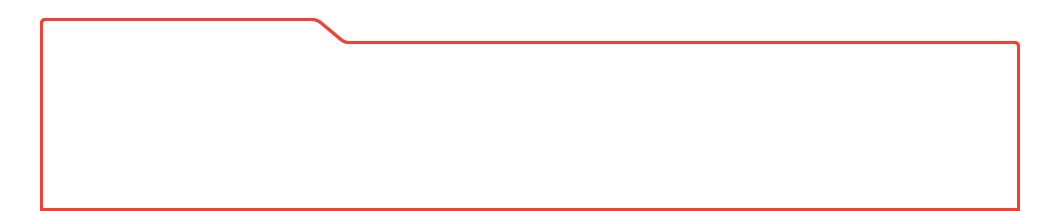
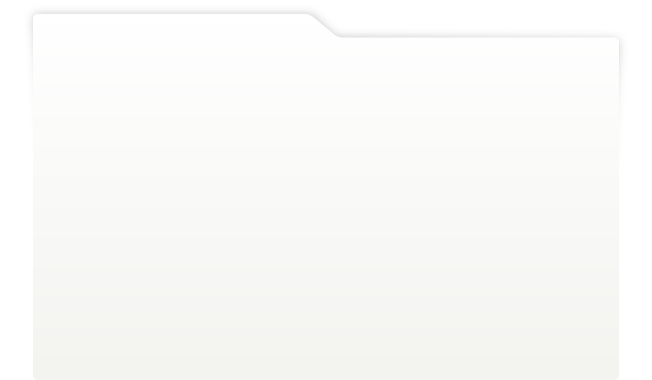
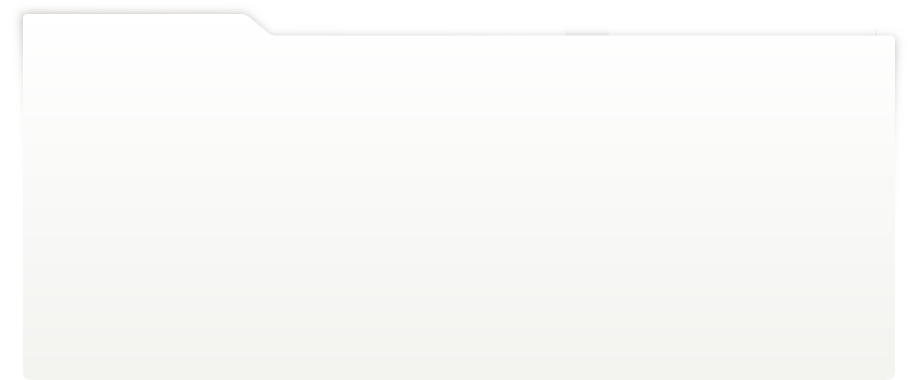
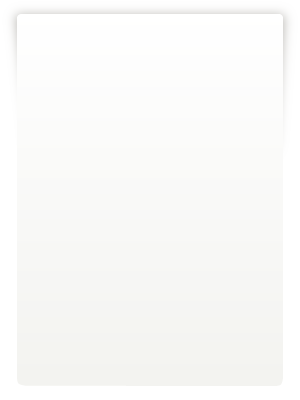
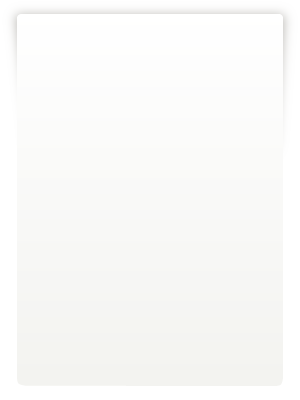
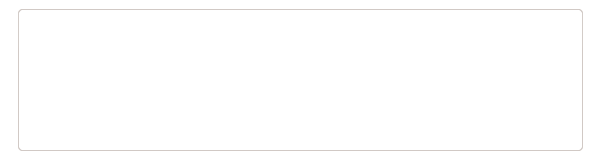
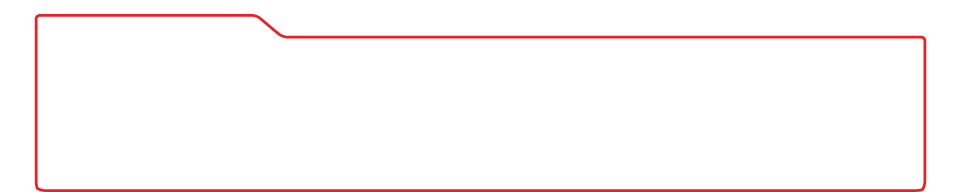
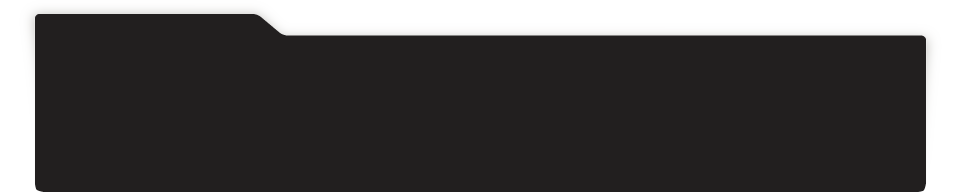
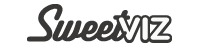
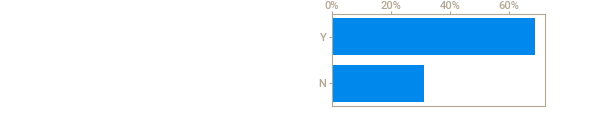
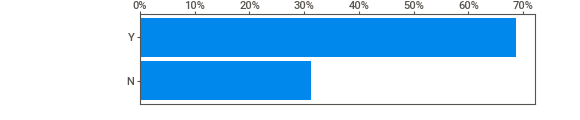
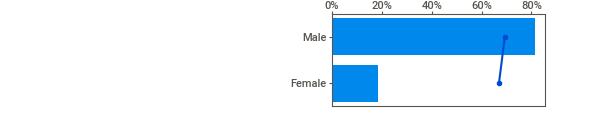
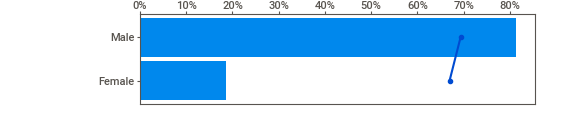
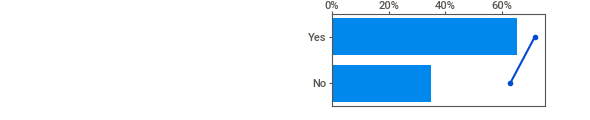
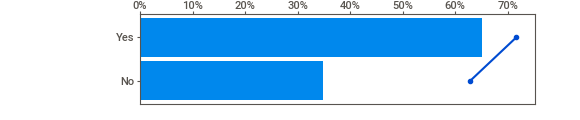
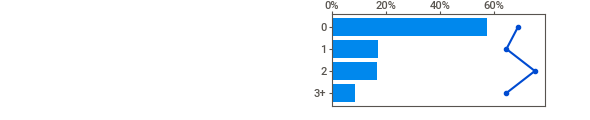
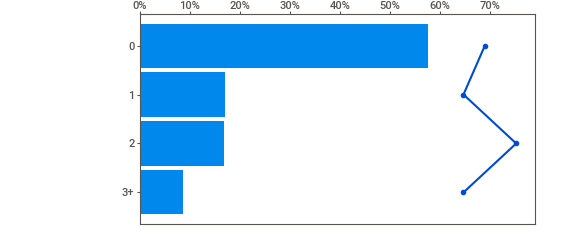
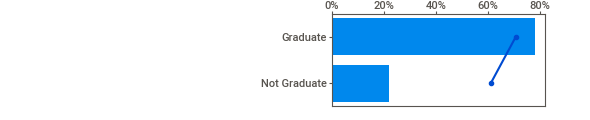
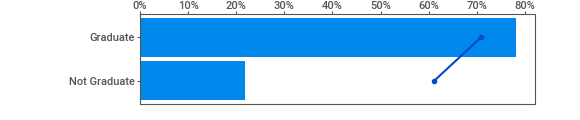
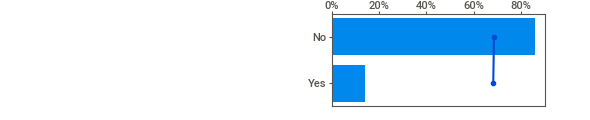
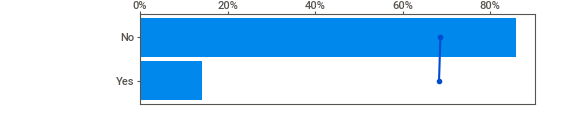
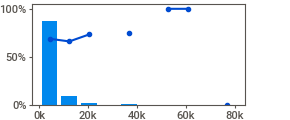
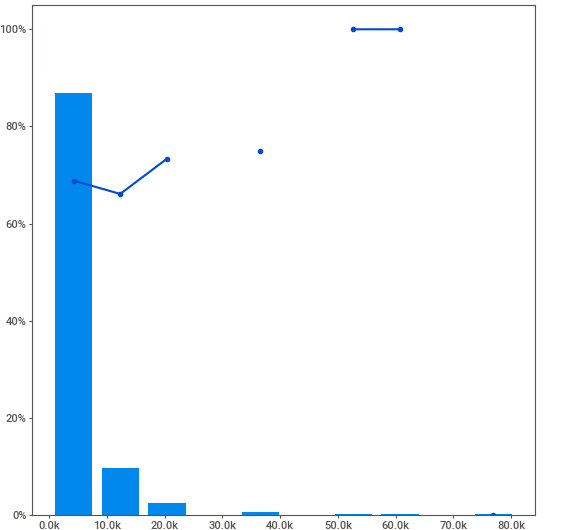
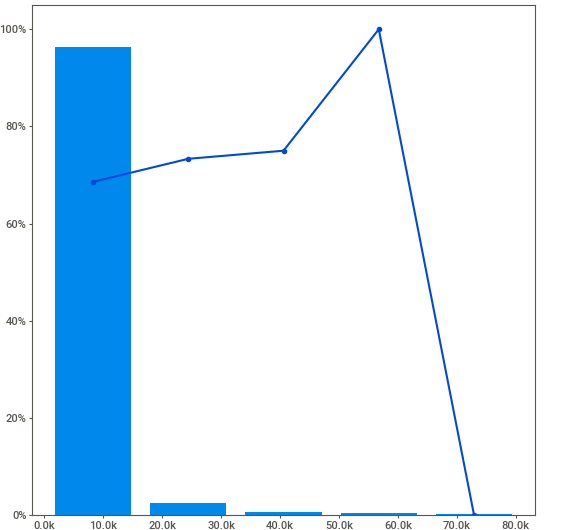
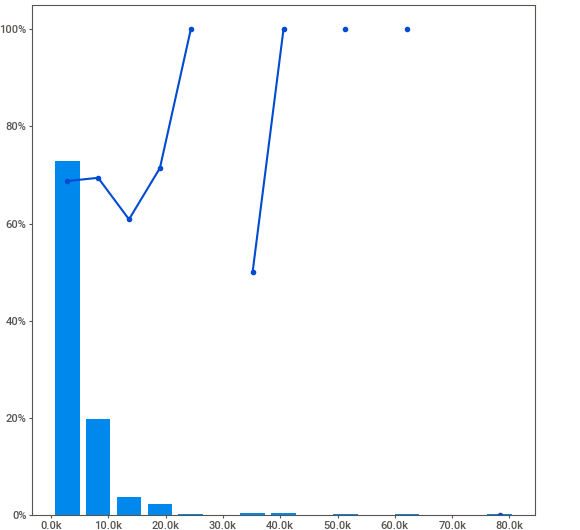
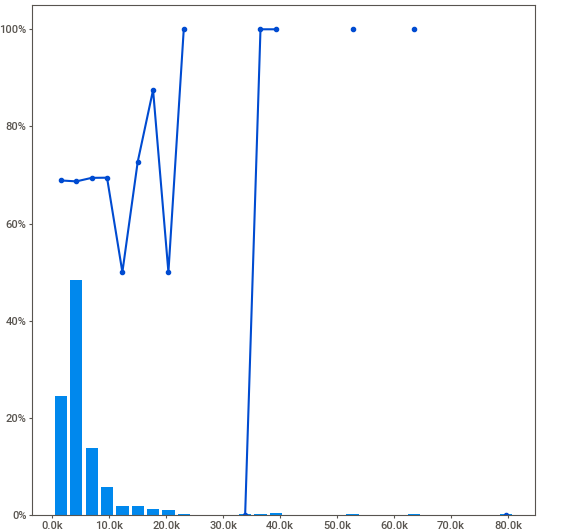
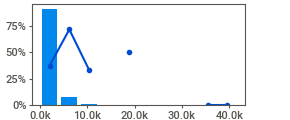
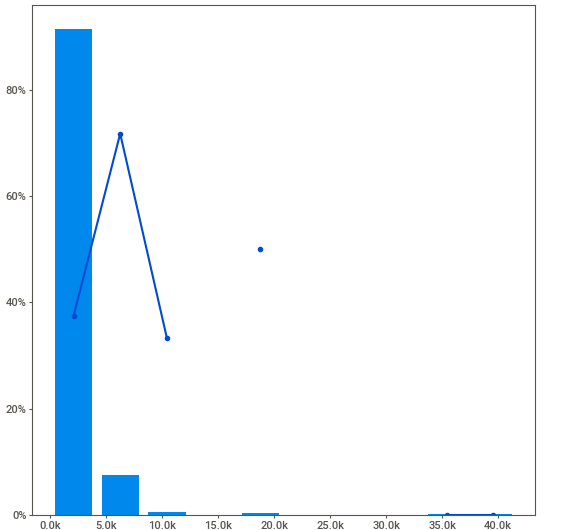
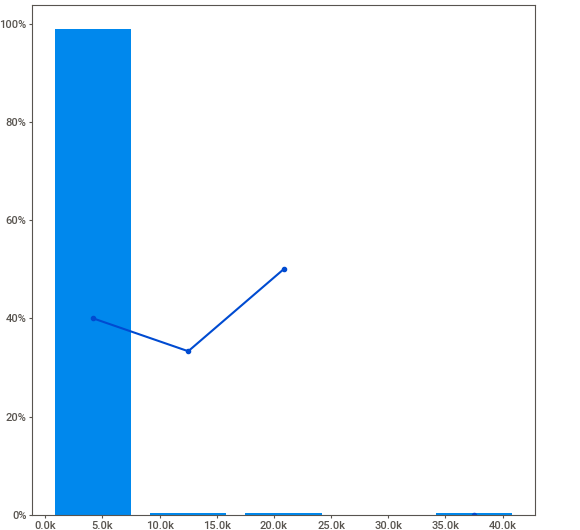
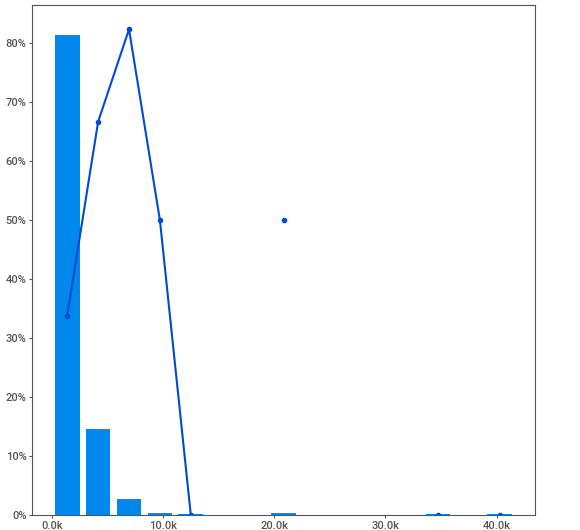
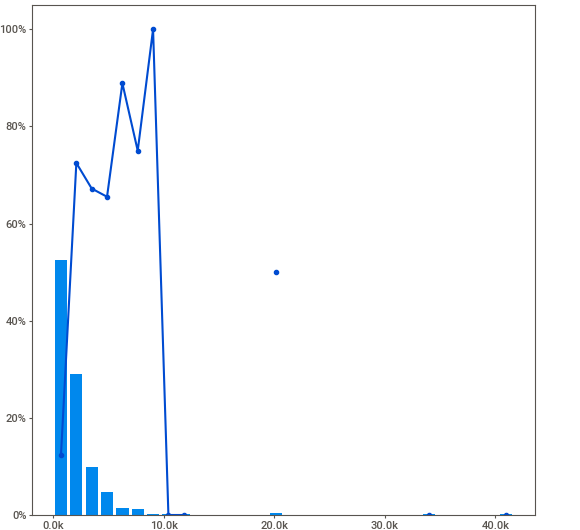
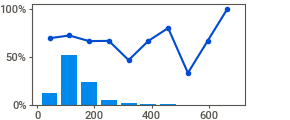
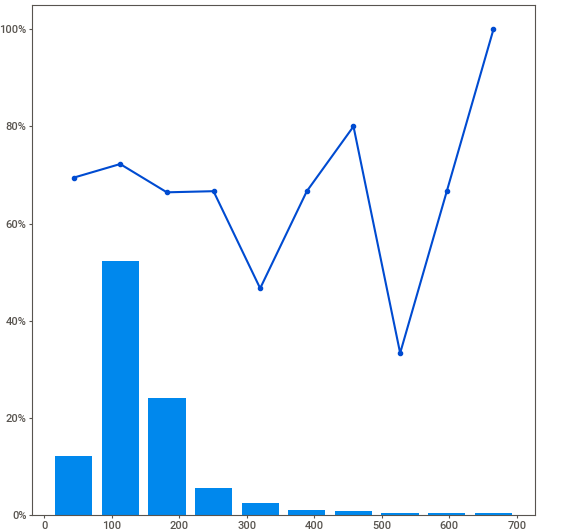
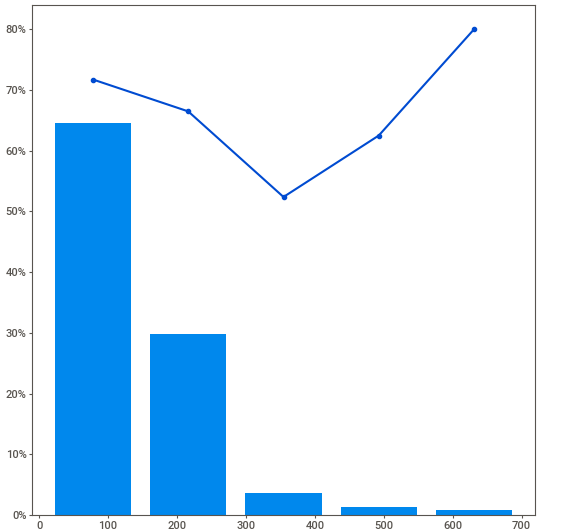
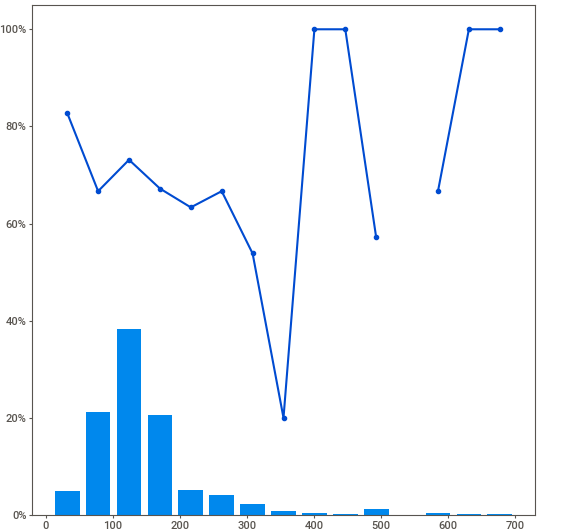
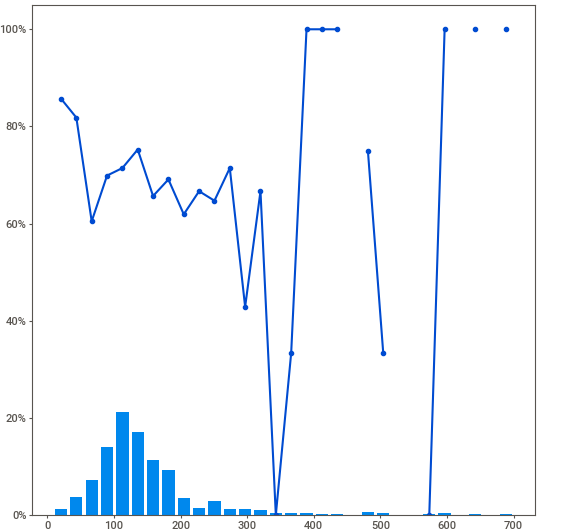
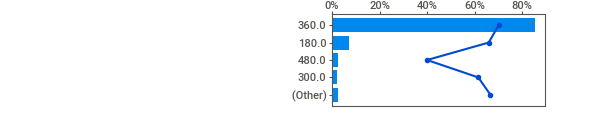
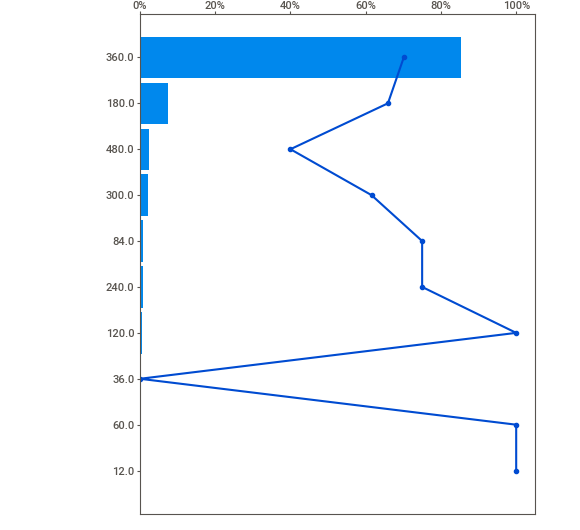
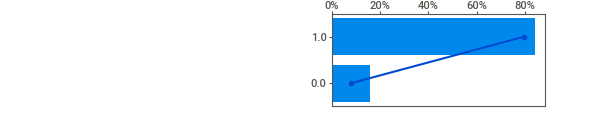
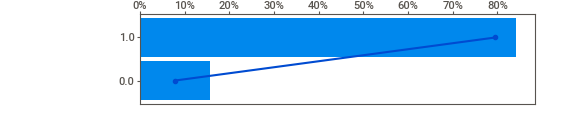
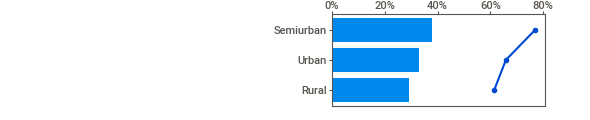
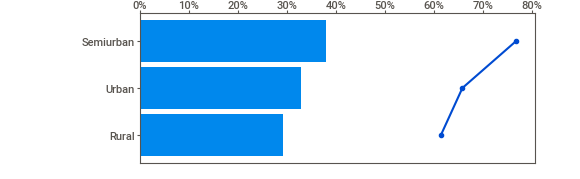
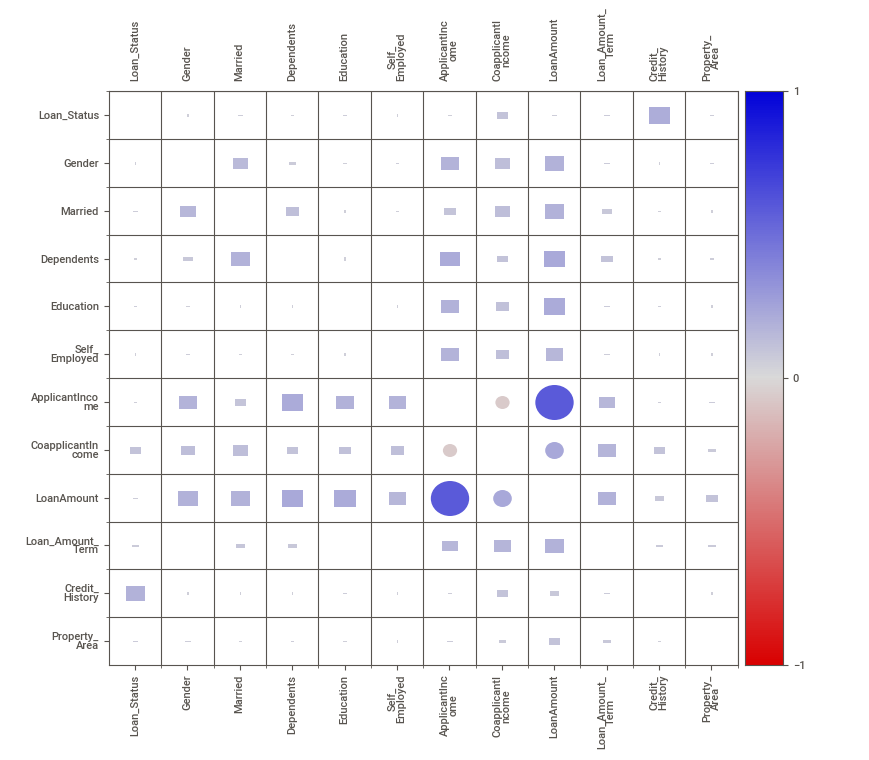
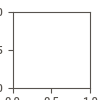

In [11]:
analysis_report2.show_notebook(w="100%",h="full")

## Compare


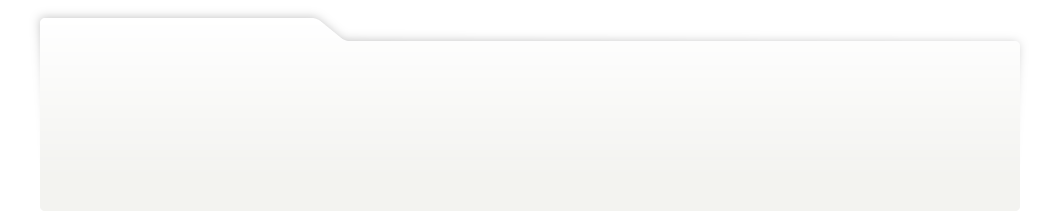
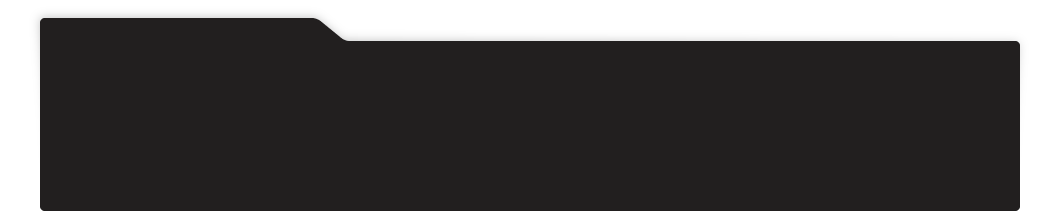
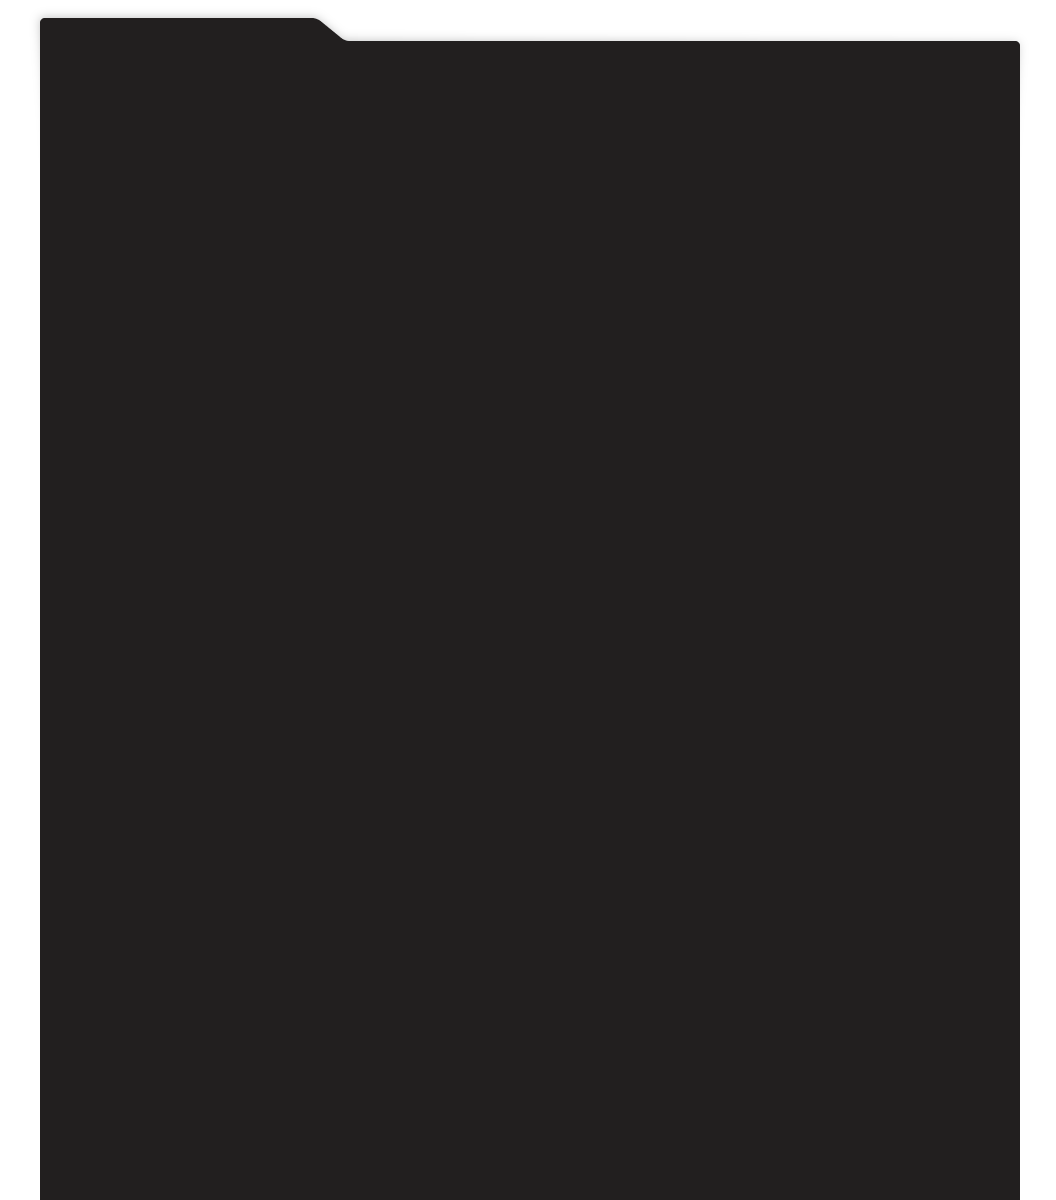
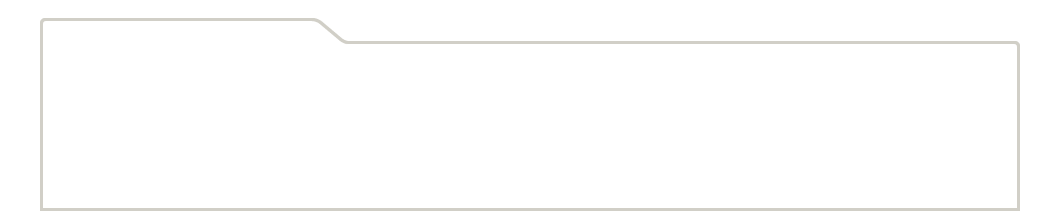
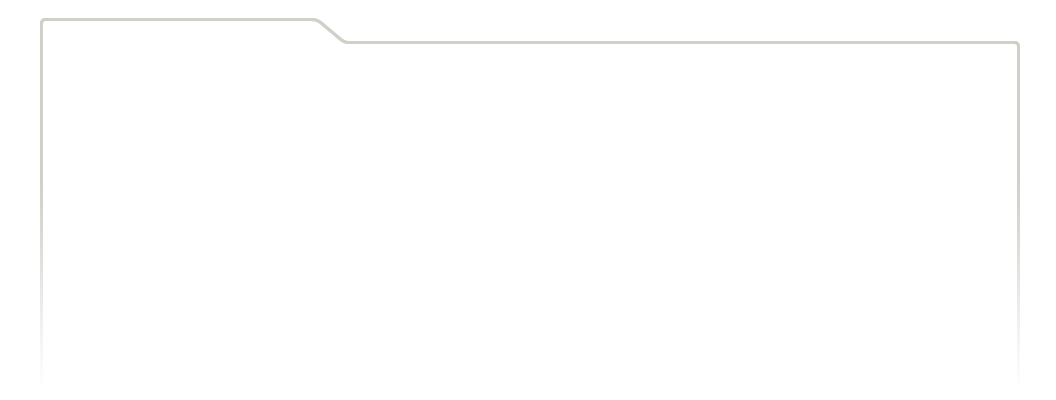
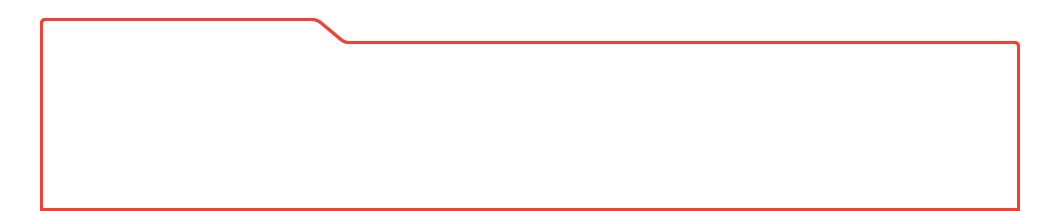
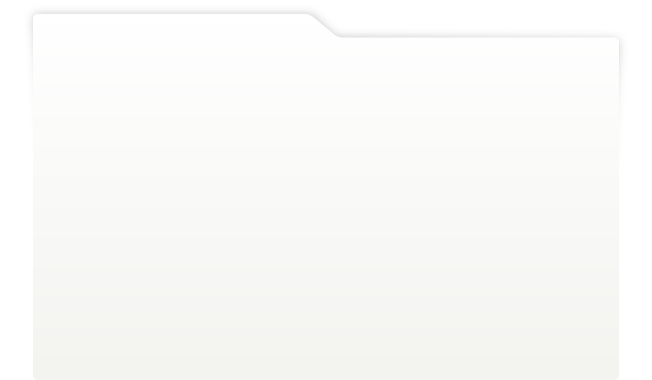
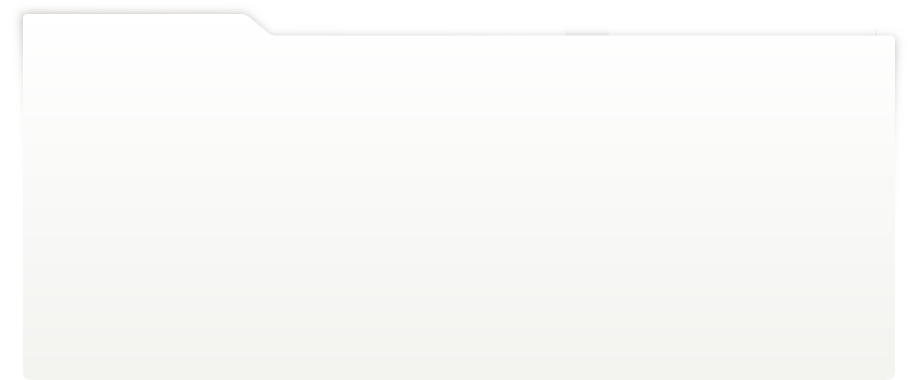
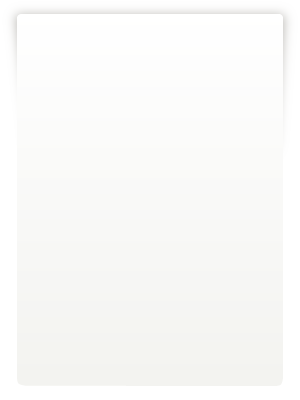
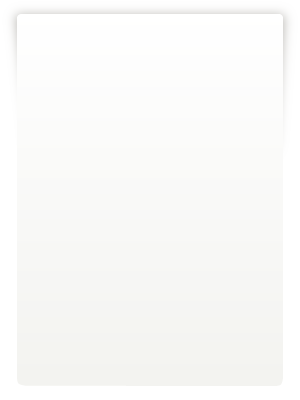
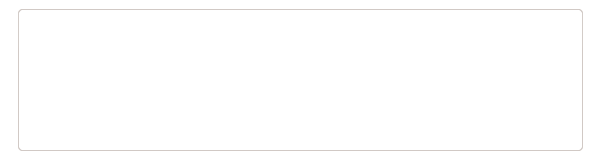
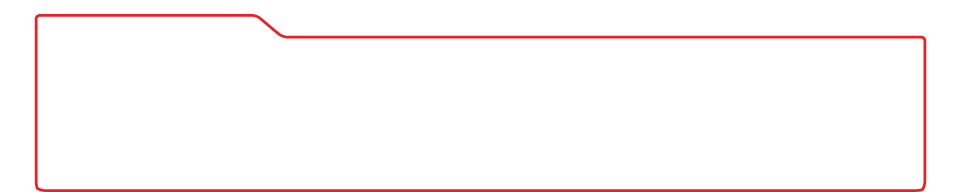
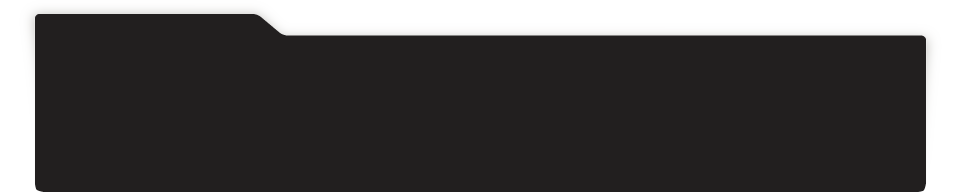
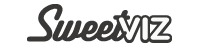
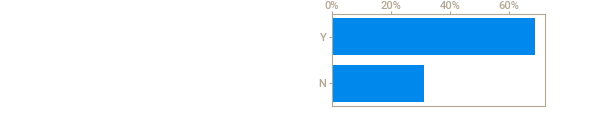
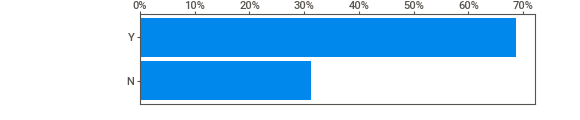
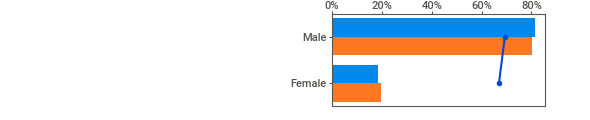
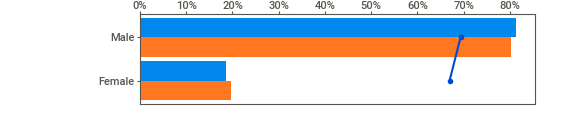
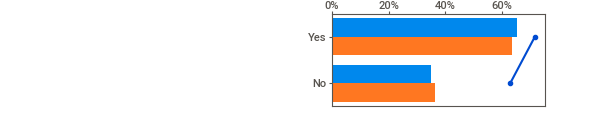
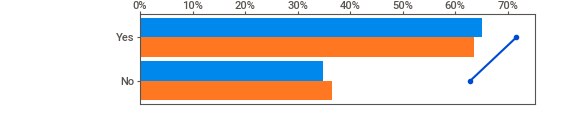
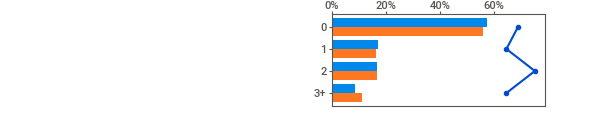
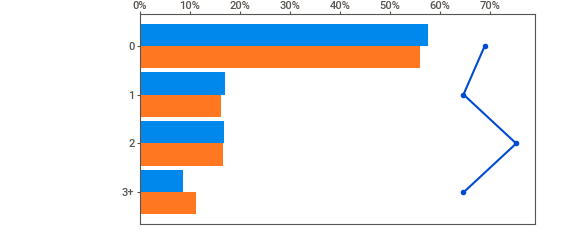
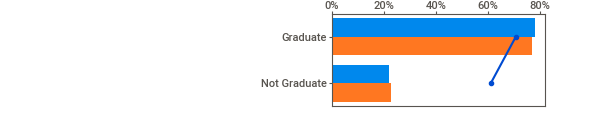
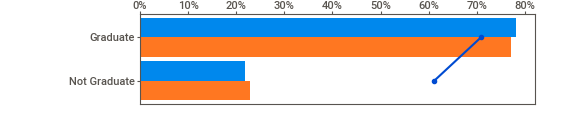
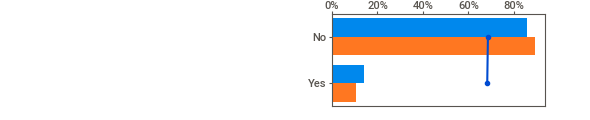
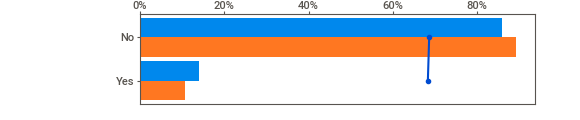
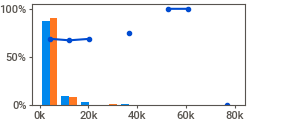
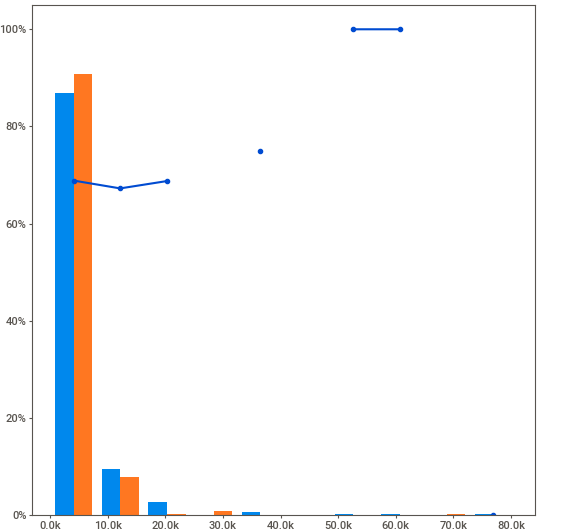
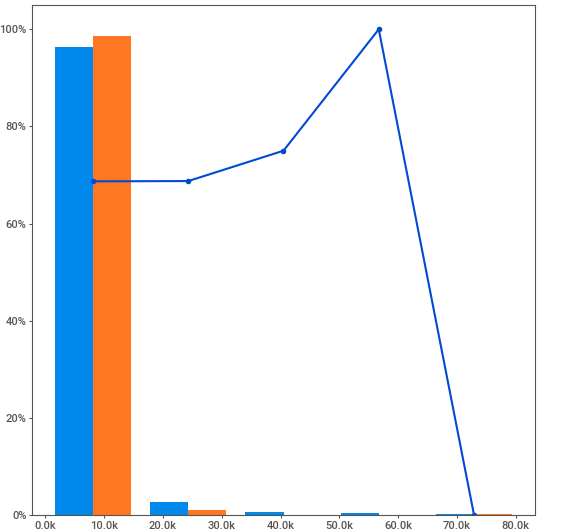
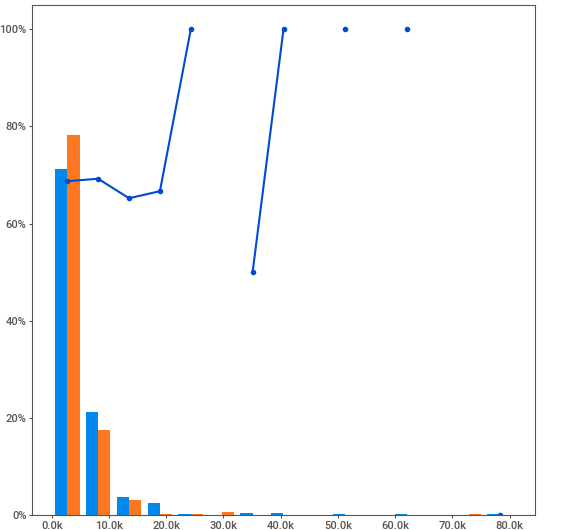
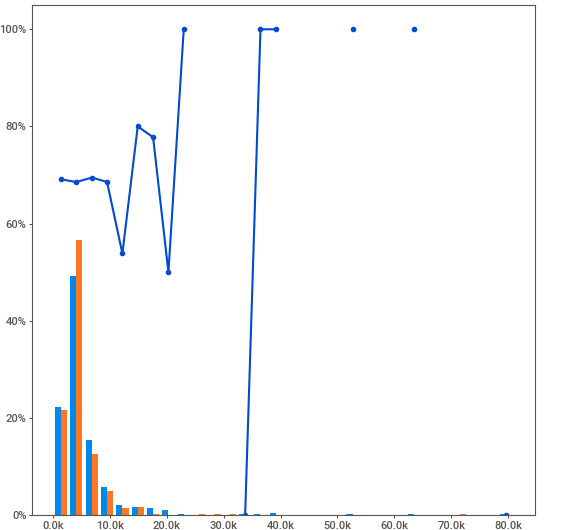
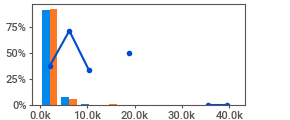
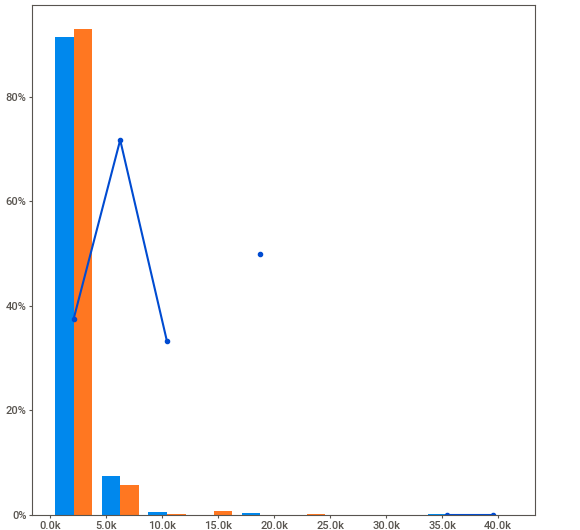
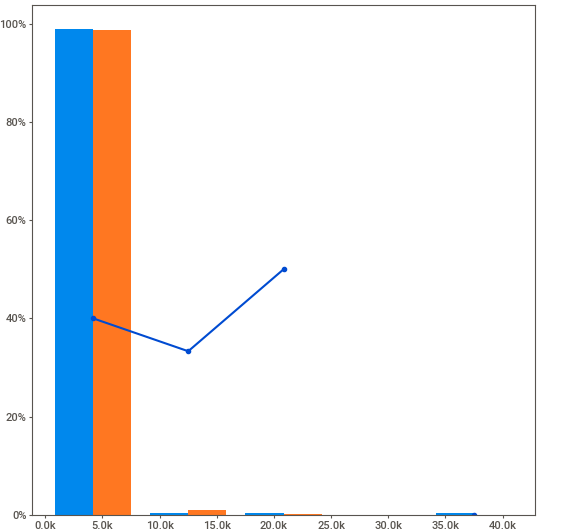
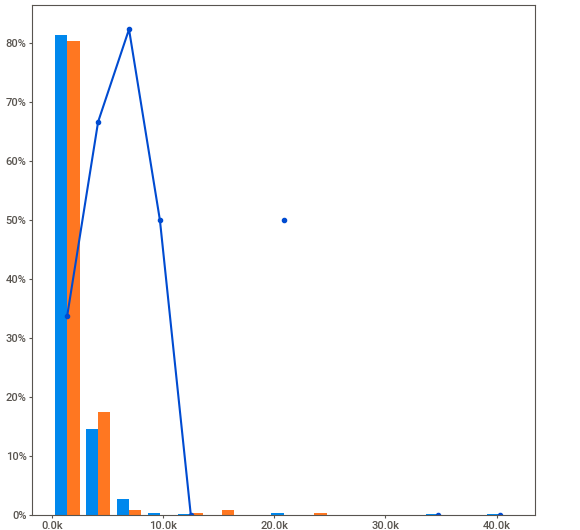
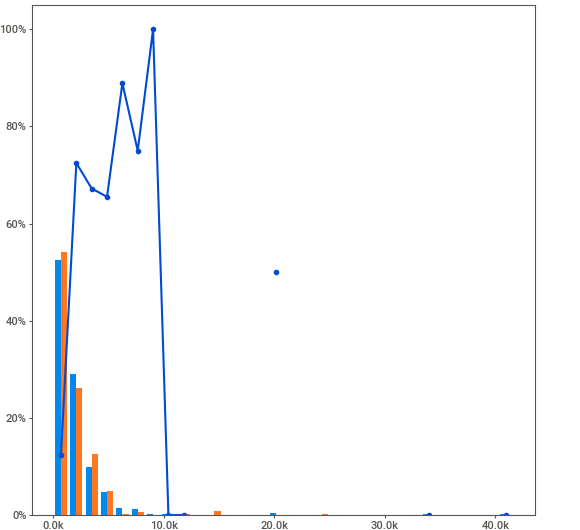
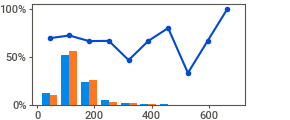
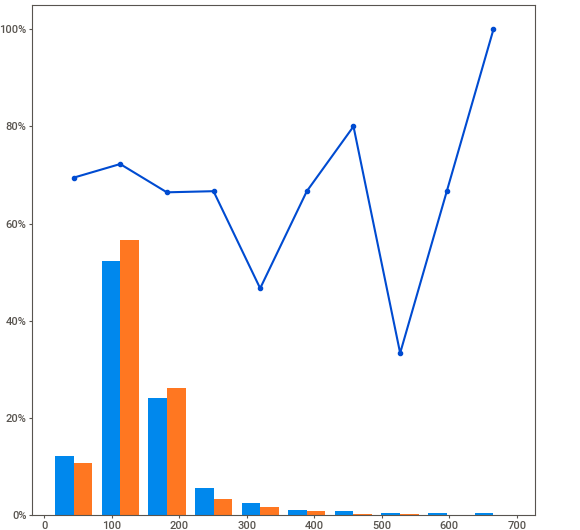
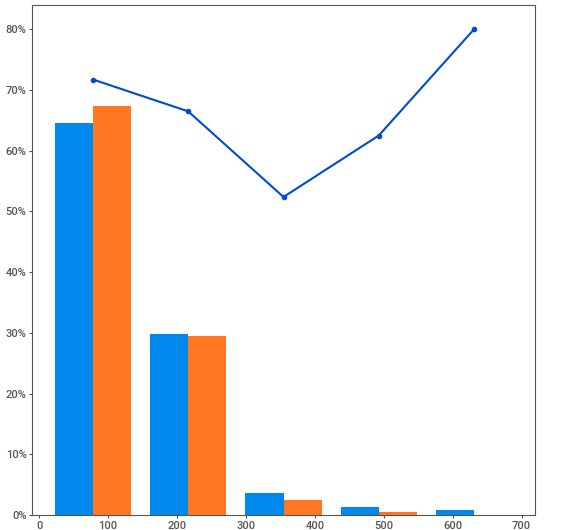
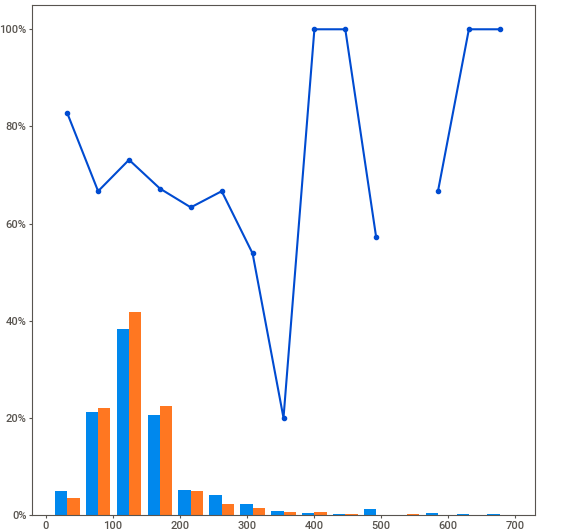
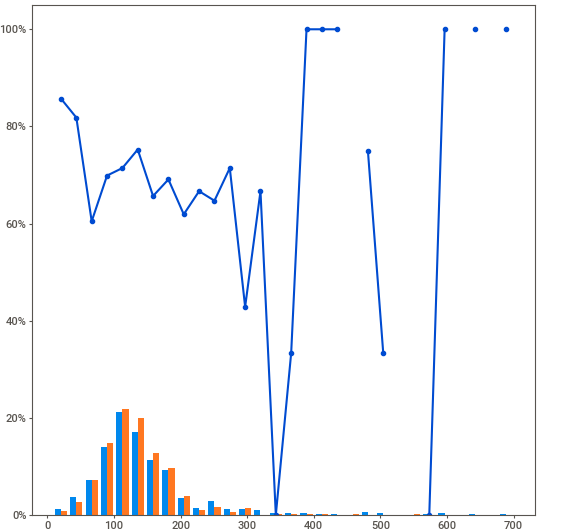
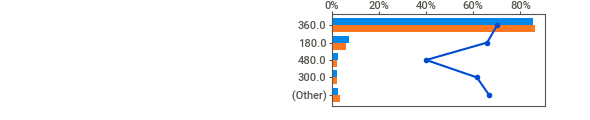
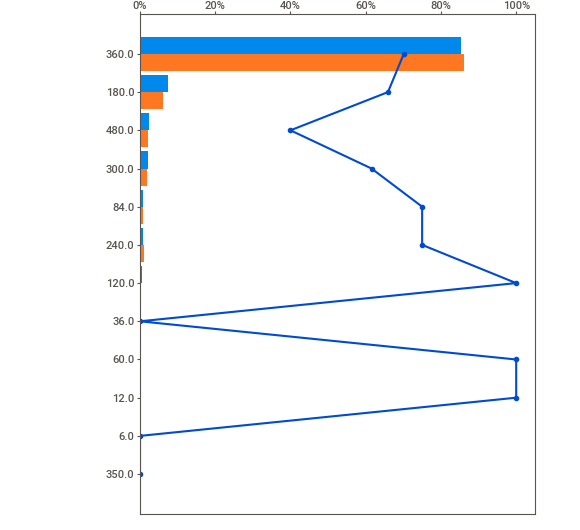
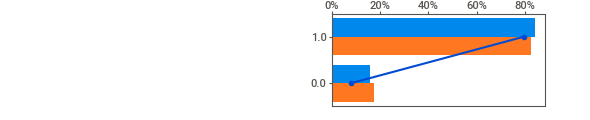
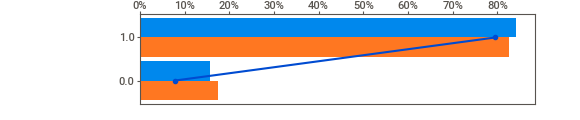
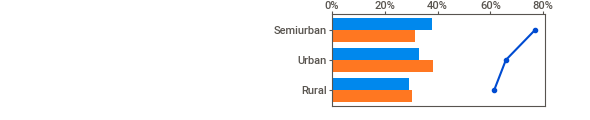
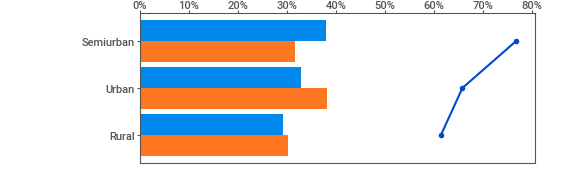
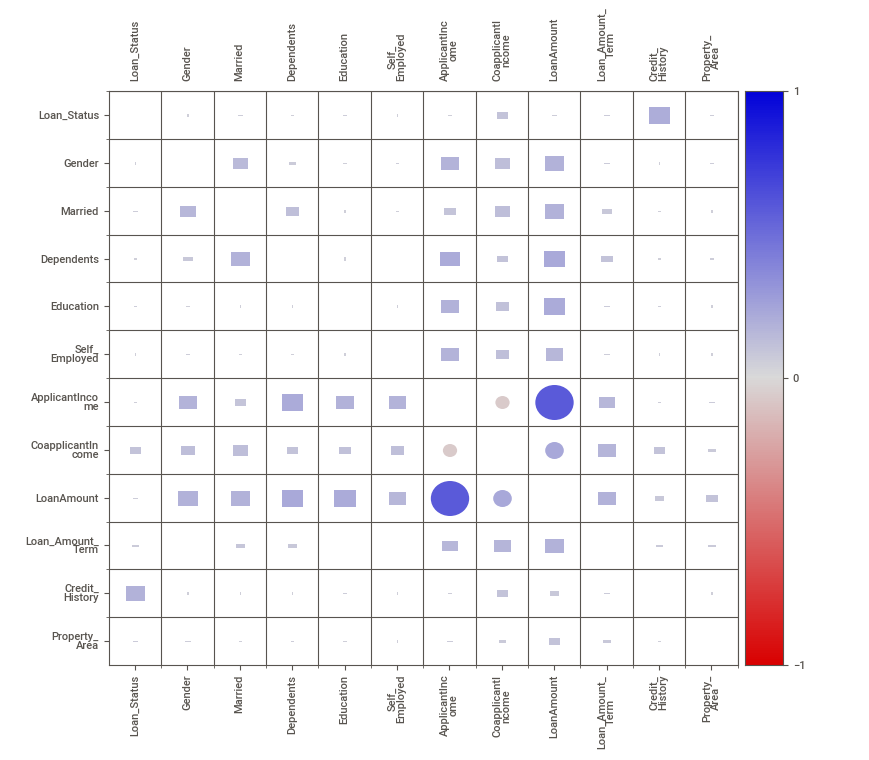
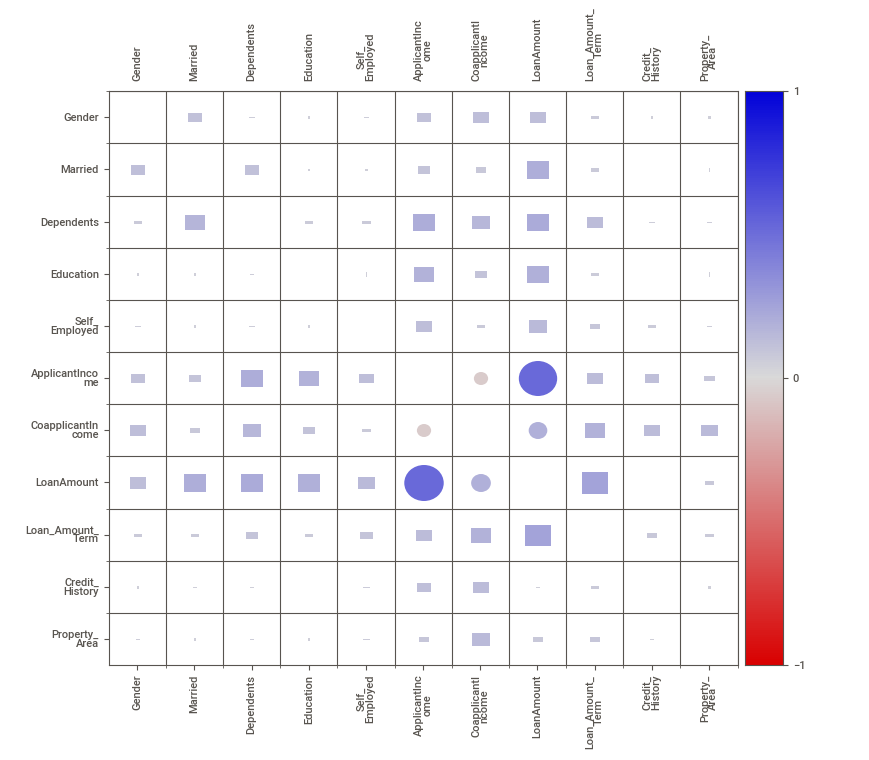

In [12]:
analysis_report3 = sv.compare([df_train,'Train'],[df_test,'Test'],target_feat='Loan_Status')

analysis_report3.show_notebook(w="100%",h="full")

## Compare_Intra()


* Use this when you want to compare two populations within the same dataset. 
* This is also a very useful report, especially when coupled with target feature analysis!


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



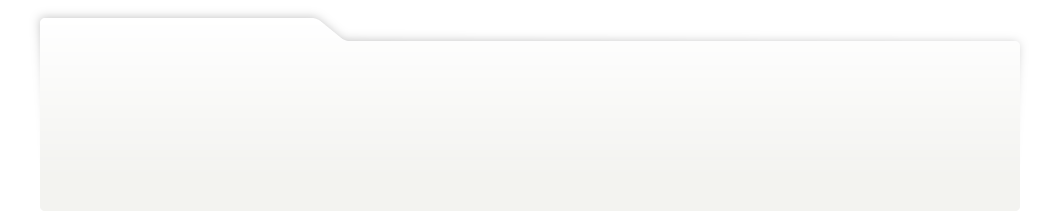
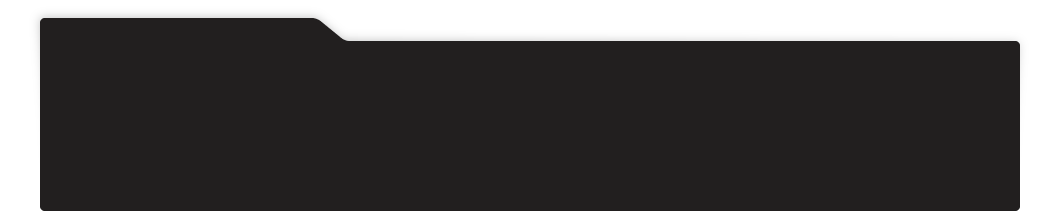
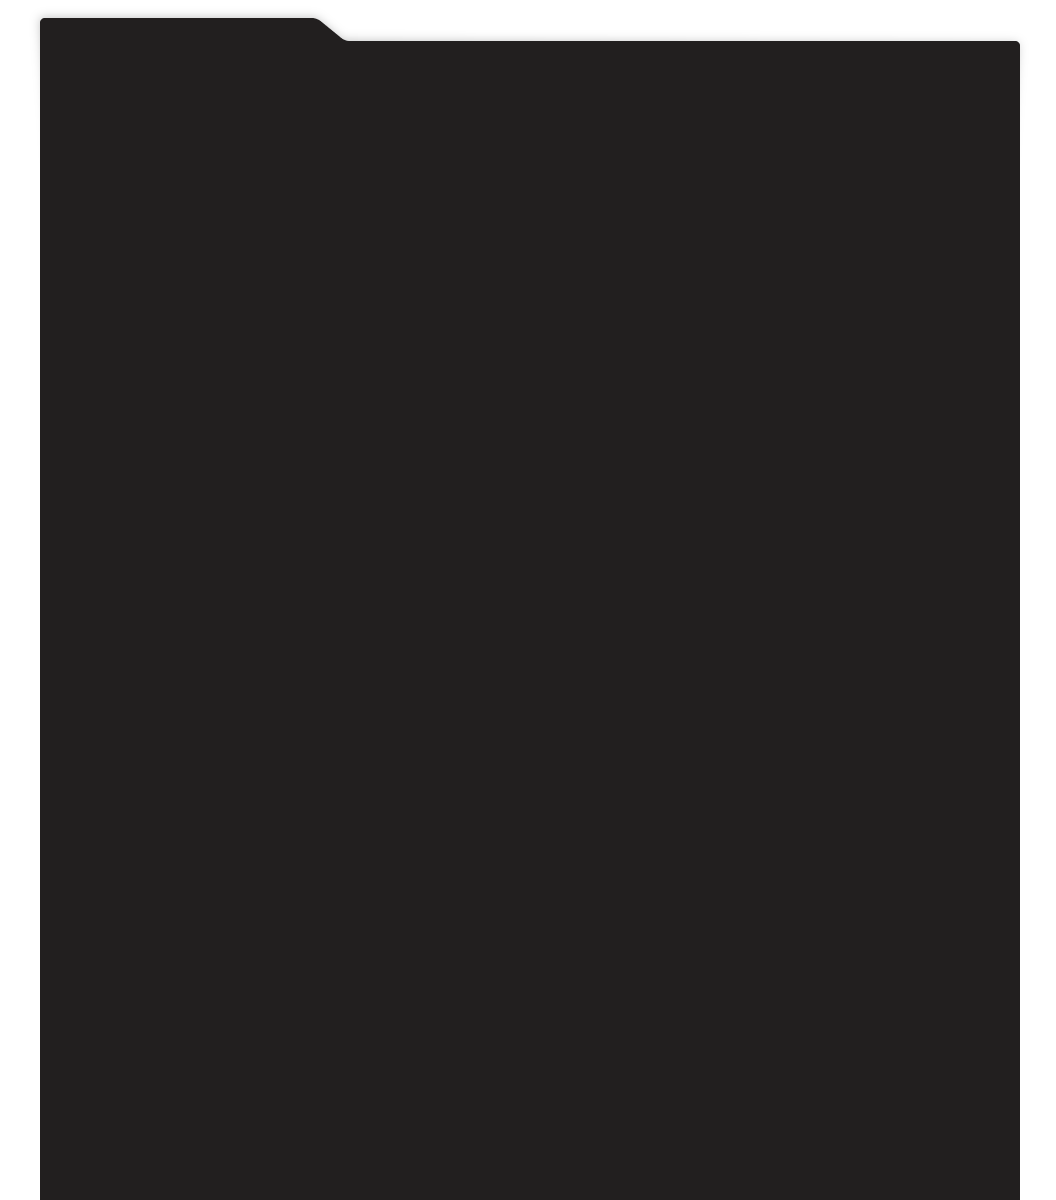
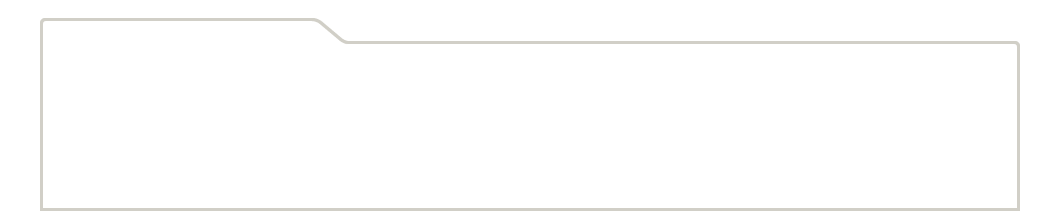
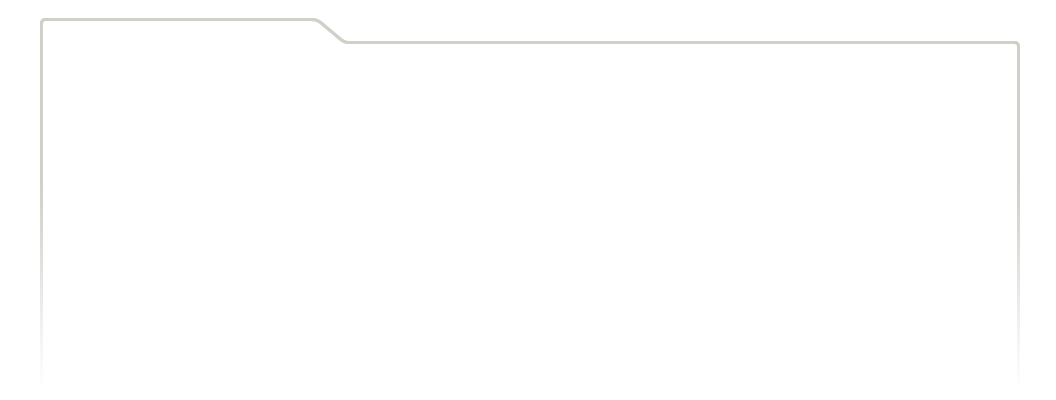
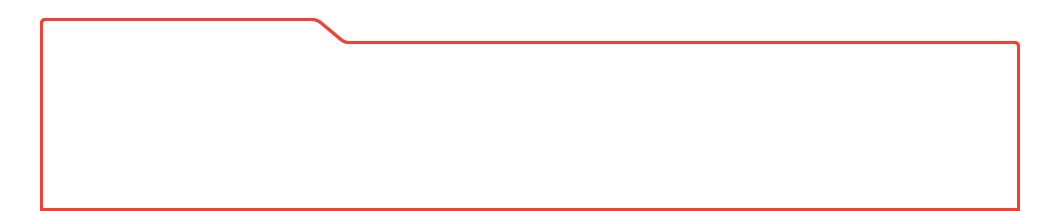
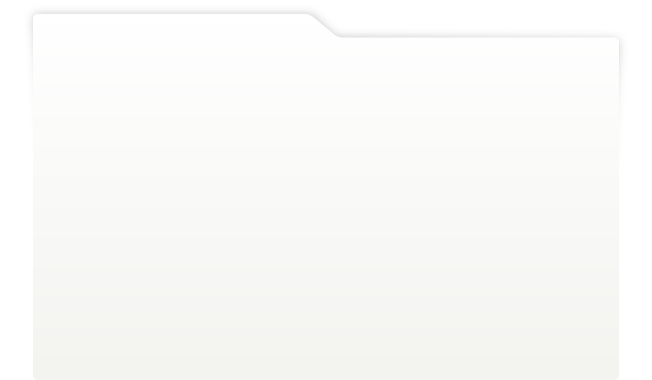
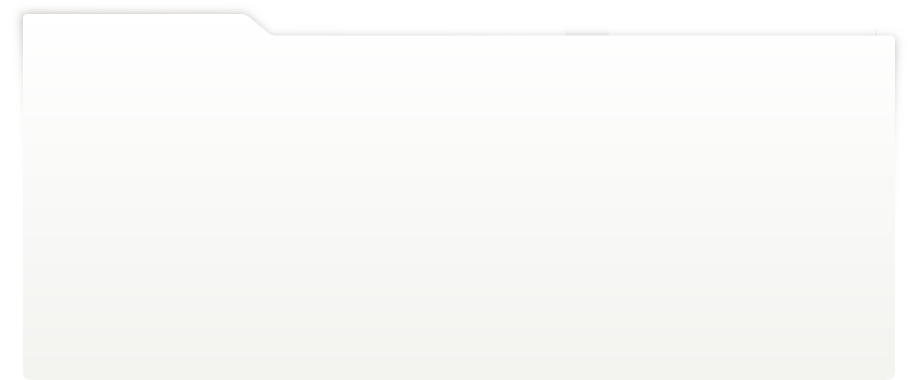
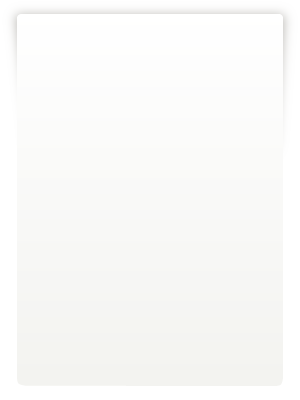
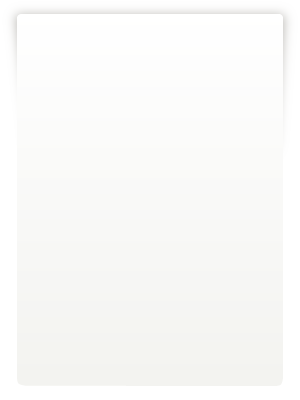
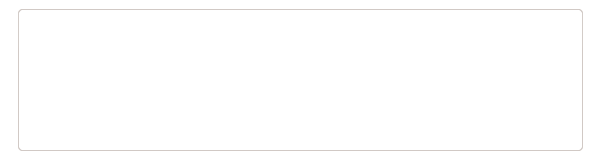
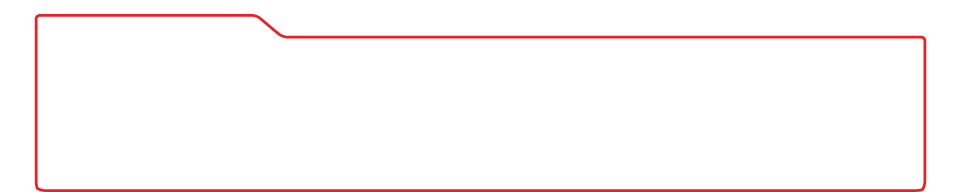
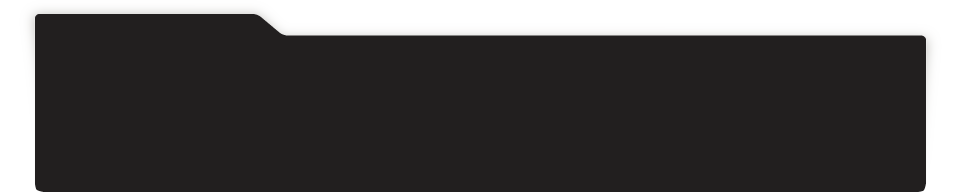
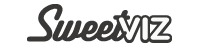
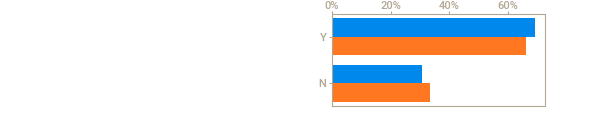
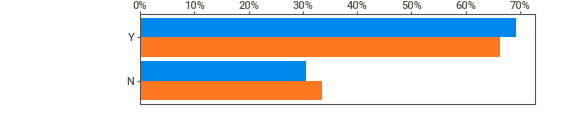
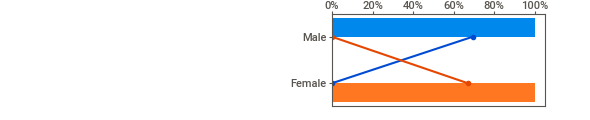
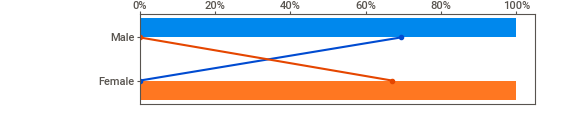
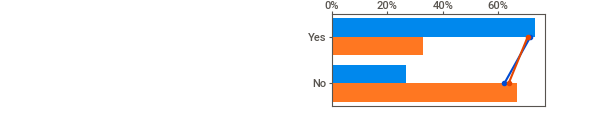
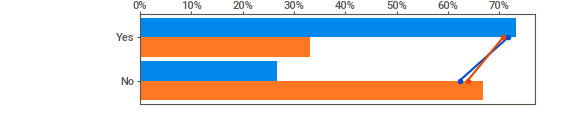
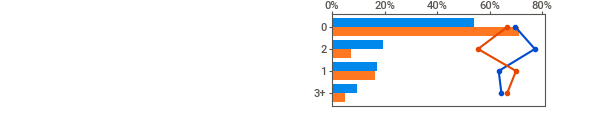
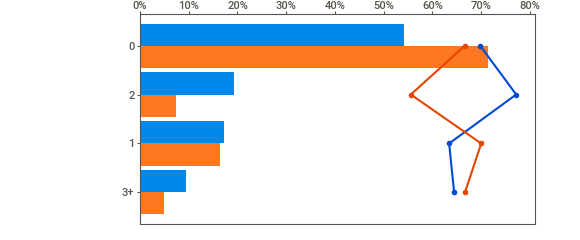
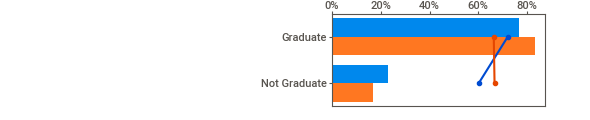
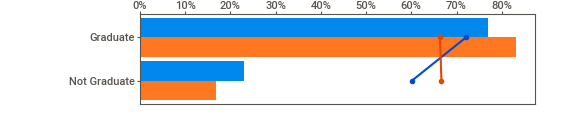
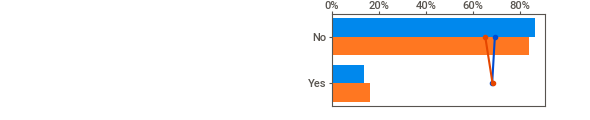
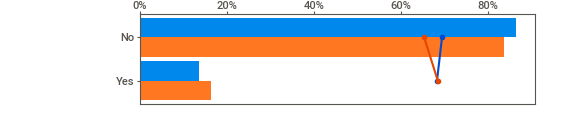
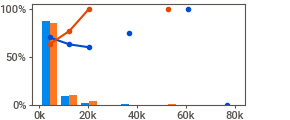
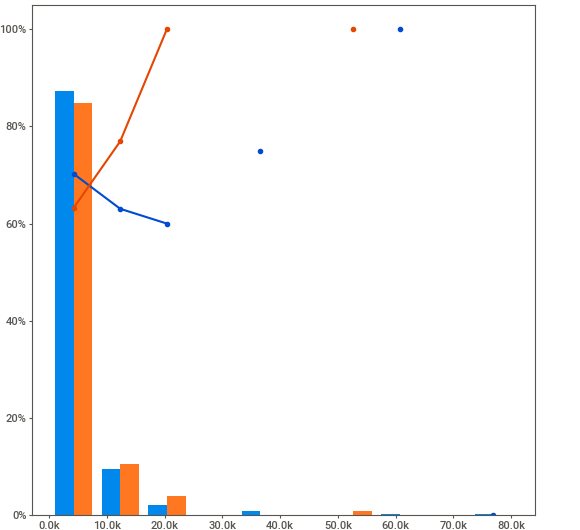
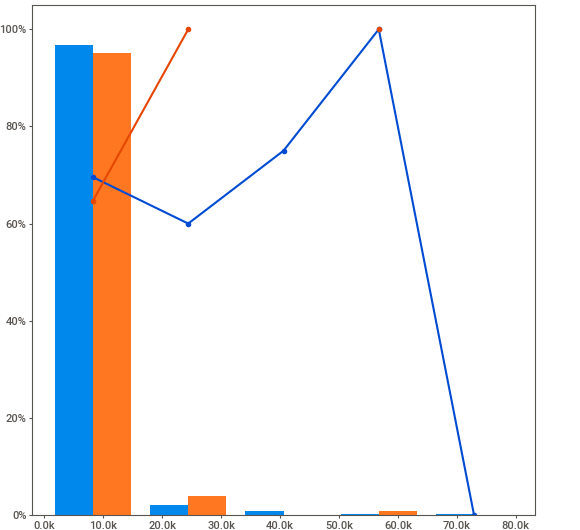
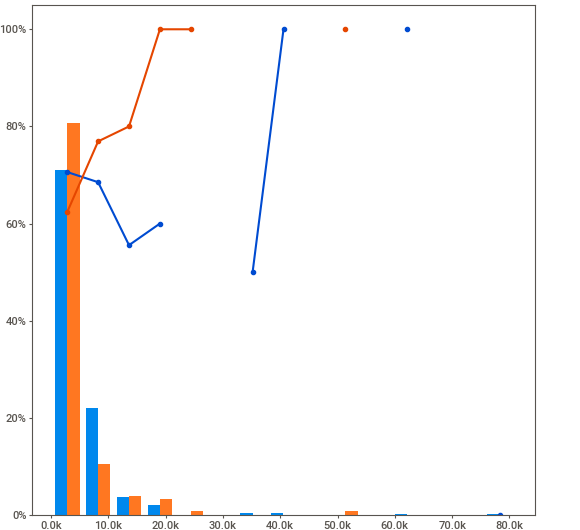
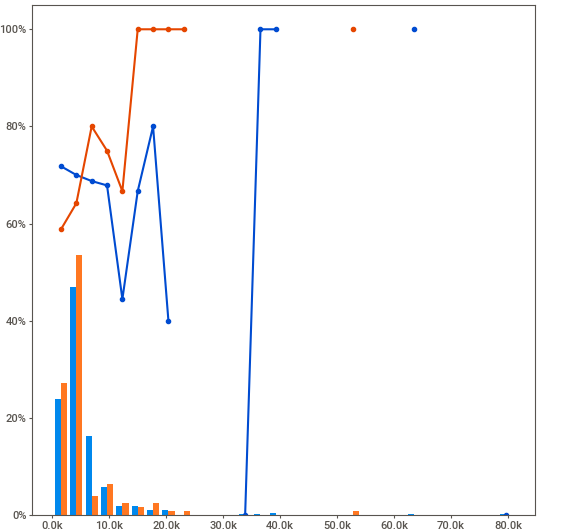
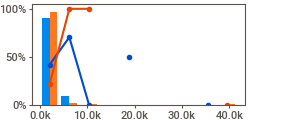
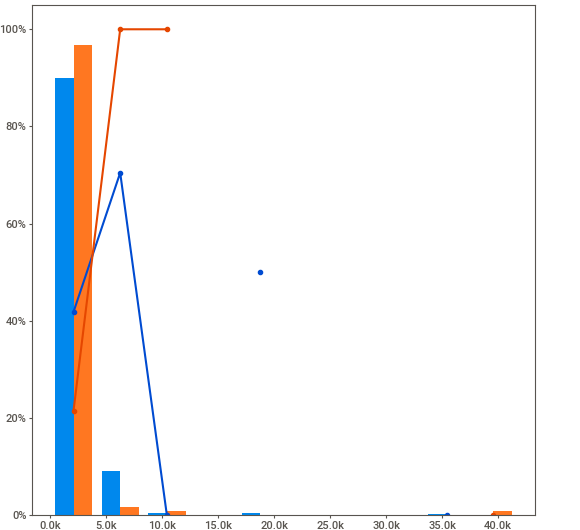
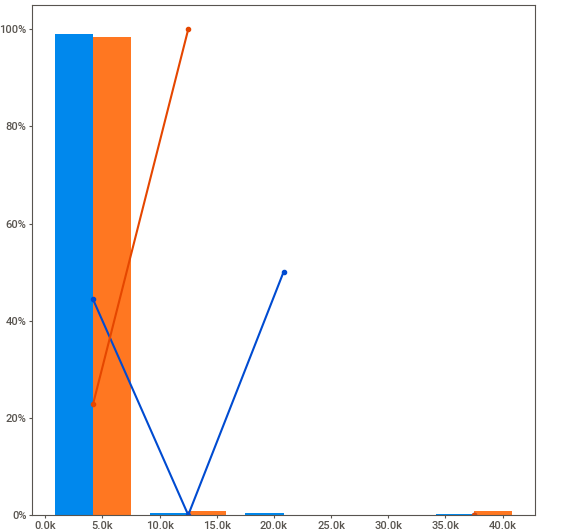
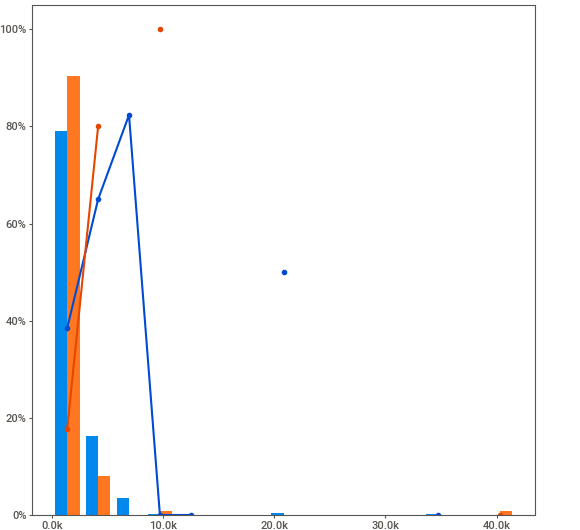
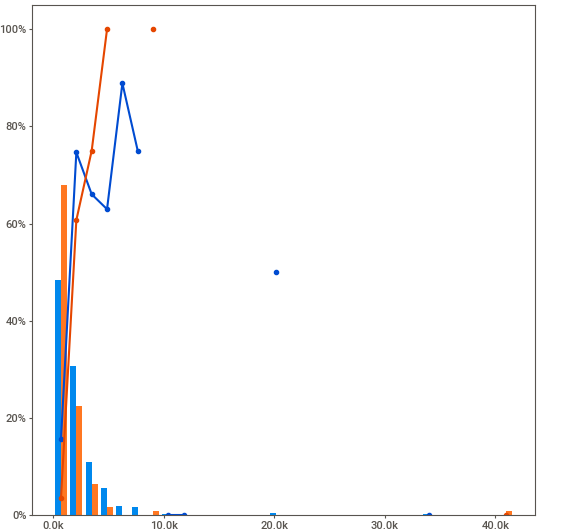
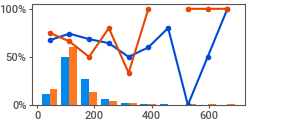
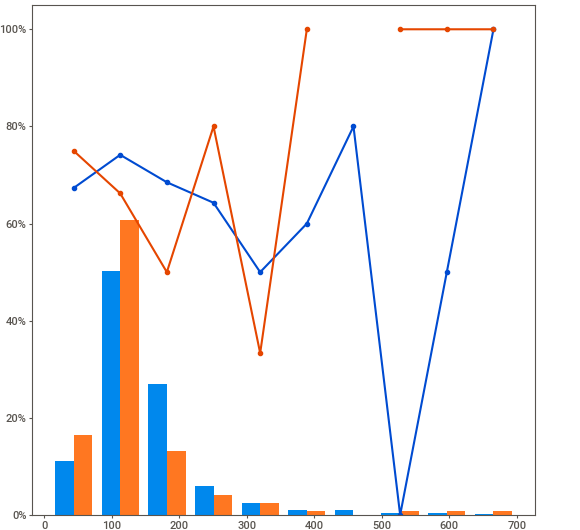
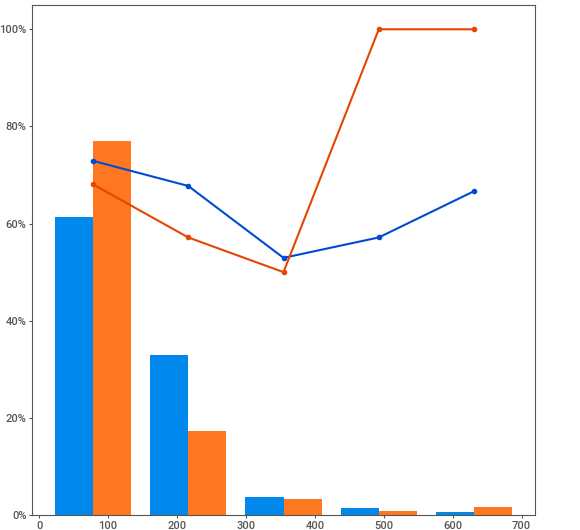
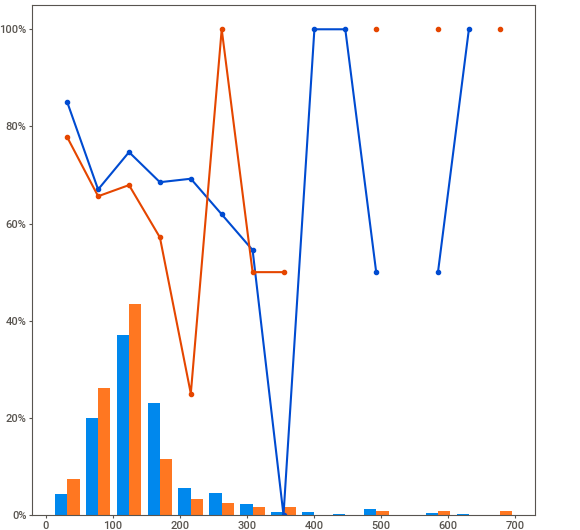
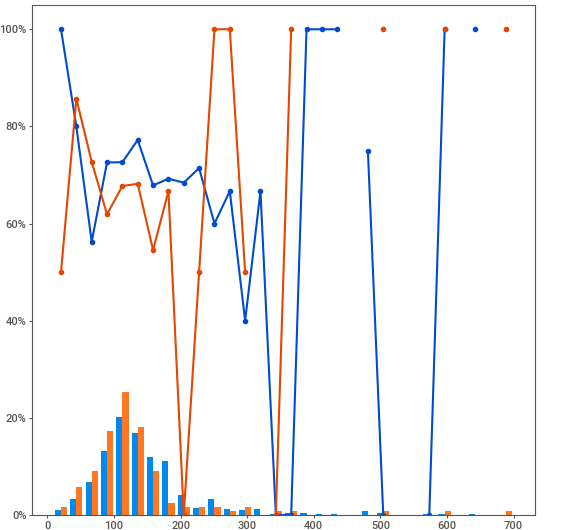
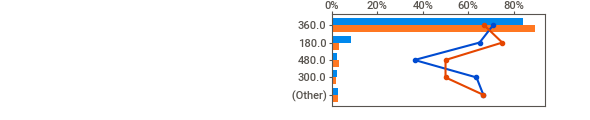
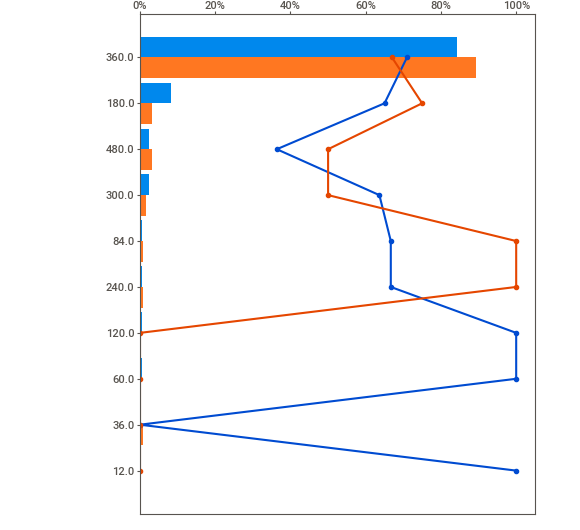
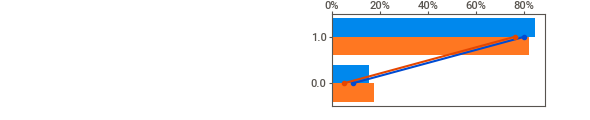
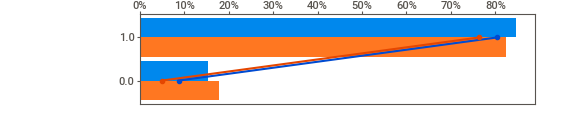
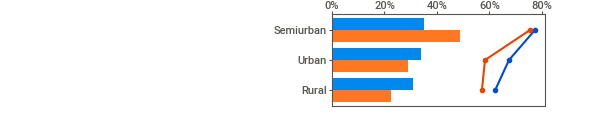
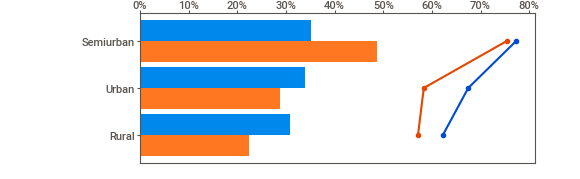
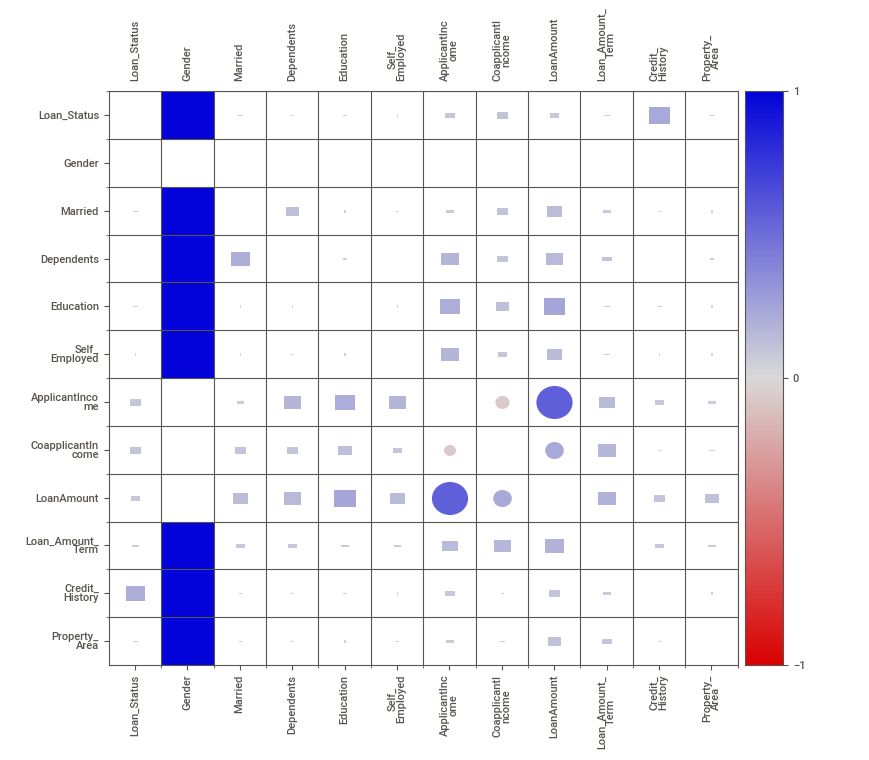
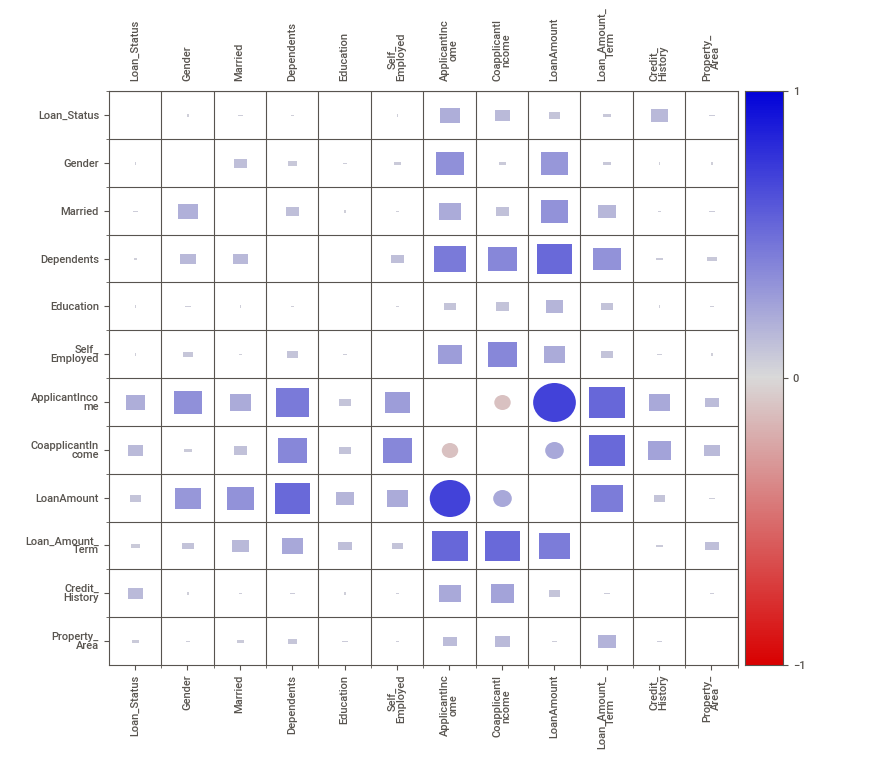

In [14]:
intra_report = sv.compare_intra(df_train, df_train["Gender"] == 'Male', ["Male", "Female"], 'Loan_Status')
intra_report.show_notebook(w=900, h=450, scale=0.8)

# Interpretation Summary

* Summary Statistics
    * Data types, unique values, missing values, duplicates, most frequent values etc
    * Numerical analysis - min/max/range, quartiles, mean/mode, standard deviation, coefficient of variation, kurtosis, skewness
* Target analysis
    * Indicates how the target feature relates to other features
* Visualization and Comparision
    * distinct datasets between train and test
    * Intra-set characteristics
* Mixed-type associations
    * Integrates association for numerical (Pearson's Correlation)
    * Categorical (Uncertainty Coefficient) and categorical-numerical (Correlation ratio) 
* Type inference
    * Automatically detects numerical, categorical and text features